In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import plotly.express as px 
import numpy as np 
import matplotlib.dates as mdates
import seaborn as sns
import scipy.stats as stats
from scipy.stats import f_oneway
from scipy.stats import tukey_hsd
from sklearn.cluster import KMeans
from statannot import add_stat_annotation
from statannotations.Annotator import Annotator
import matplotlib.patheffects as PathEffects

## Read weather observation data

In [2]:
station_limbo = pd.read_csv('D:/OneDrive - University of Glasgow/RA/Weather_station/LIMBO.csv')

In [3]:
station_limbo['Report Date / Time'] = pd.to_datetime(station_limbo['Report Date / Time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# Convert field to datetime type 
station_limbo['Report Date / Time'] = pd.to_datetime(station_limbo['Report Date / Time'])  
station_limbo['Report Date / Time'] 

0       2023-07-01 00:00:33
1       2023-07-01 00:05:34
2       2023-07-01 00:10:35
3       2023-07-01 00:15:36
4       2023-07-01 00:20:37
                ...        
23732   2023-09-30 23:37:08
23733   2023-09-30 23:42:09
23734   2023-09-30 23:47:10
23735   2023-09-30 23:52:11
23736   2023-09-30 23:57:12
Name: Report Date / Time, Length: 23737, dtype: datetime64[ns]

In [4]:
station_limbo.index = station_limbo['Report Date / Time']
station_limbo.head()

,Id,Site Id,Longitude,Latitude,Report Date / Time,Air Temperature,Wet Bulb,Dew Point,Concrete Temp.,Grass Temp.,...,v1_Coastal,v1_Flood,v1_Ice,v1_Landslide,v1_Lightning,v1_PoorVisibility,v1_Snow,v1_Wildfire,v1_Wind,v1_Other
Report Date / Time,,,,,,,,,,,,,,,,,,,,,
2023-07-01 00:00:33,﻿20230701jrdbs6azwee67rj4yyb969uz5r,16ef4fbb-3820-e911-9461-0003ff5986c6,-0.0706,51.482,2023-07-01 00:00:33,18.3,NaN,15.6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-01 00:05:34,2023070197xt3nozwee67rj4yyb969uz5r,16ef4fbb-3820-e911-9461-0003ff5986c6,-0.0706,51.482,2023-07-01 00:05:34,18.3,NaN,15.6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-01 00:10:35,20230701ihcdj5azwce67rj4yyb969uz5r,16ef4fbb-3820-e911-9461-0003ff5986c6,-0.0706,51.482,2023-07-01 00:10:35,18.3,NaN,15.6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-01 00:15:36,20230701ct44hnezwoe67rj4yyb969uz5r,16ef4fbb-3820-e911-9461-0003ff5986c6,-0.0706,51.482,2023-07-01 00:15:36,18.3,NaN,15.6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-01 00:20:37,20230701d8144fozwwe67rj4yyb969uz5r,16ef4fbb-3820-e911-9461-0003ff5986c6,-0.0706,51.482,2023-07-01 00:20:37,18.3,NaN,15.6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Read sensor data

### sensor id

In [5]:
# read sensor id
sensor_id = pd.read_csv('SensorID_EPC_Survey_Open_Data.csv')

In [6]:
# Convert field to datetime type 
sensor_id['Battery Charging Start Time'] = pd.to_datetime(sensor_id['Battery Charging Start Time'], format="%d/%m/%Y %H:%M")  
sensor_id['Battery Charging End Time'] = pd.to_datetime(sensor_id['Battery Charging End Time'], format="%d/%m/%Y %H:%M")  

sensor_id['Recording Start Time (Participant)'] = pd.to_datetime(sensor_id['Recording Start Time (Participant) '], format="%d/%m/%Y %H:%M")  
sensor_id['Recording End Time (Participant)'] = pd.to_datetime(sensor_id['Recording End Time (Participant) '], format="%d/%m/%Y %H:%M")

In [7]:
# Set ID as index
sensor_id = sensor_id.set_index('ID')

In [8]:
# Define final start datetime and end datetime
# Delay 1 hour to allow the sensor settled in the indoor condition and improve the accuracy of indoor temperature measurement
sensor_id[['start_datetime']] = sensor_id[['Battery Charging Start Time']] + pd.Timedelta(hours=1)
sensor_id[['end_datetime']] = sensor_id[['Battery Charging End Time']]

sensor_id.start_datetime.fillna(sensor_id['Recording Start Time (Participant)'], inplace=True)
sensor_id.end_datetime.fillna(sensor_id['Recording End Time (Participant)'], inplace=True)

### Sensors data

In [9]:
# read and filter sensors data
sensors_data_path = 'Smart_Citizen_Data_Concat/'

sensors_data = {}

for data_path in os.listdir(sensors_data_path):
    df = pd.read_csv(sensors_data_path+data_path)

    df['TIME'] = pd.to_datetime(df['TIME'])  
    df['TIME'] = df['TIME'].dt.tz_convert(None)

    start_date_value = sensor_id.loc[data_path[:-4]]['start_datetime']
    end_date_value = sensor_id.loc[data_path[:-4]]['end_datetime']

    df = df[(df['TIME'] >= start_date_value) & (df['TIME'] <= end_date_value)]
    df = df.set_index('TIME')

    sensors_data[data_path[:-4]] = df

In [10]:
sensors_data

{'BL007-02':                      Unnamed: 0   TEMP    HUM  BATT  LIGHT  NOISE_A   PRESS  \
 TIME                                                                          
 2023-08-04 19:01:11          60  25.69  57.34    97      2    54.97  101.80   
 2023-08-04 19:02:11          61  25.64  57.35    97      2    54.38  101.80   
 2023-08-04 19:03:11          62  25.58  57.60    97      2    49.49  101.79   
 2023-08-04 19:04:11          63  25.53  57.45    97      0    34.80  101.79   
 2023-08-04 19:05:11          64  25.49  57.74    97      0    36.59  101.79   
 ...                         ...    ...    ...   ...    ...      ...     ...   
 2023-09-13 15:44:06       54961  26.32  48.50    99      5    51.28  102.17   
 2023-09-13 15:45:06       54962  26.31  48.45    99      5    45.50  102.17   
 2023-09-13 15:46:06       54963  26.27  48.39    99      5    43.37  102.17   
 2023-09-13 15:47:06       54964  26.29  48.73    99      5    51.88  102.17   
 2023-09-13 15:48:06       5

## raw measurement

In [11]:
household_temp={}

for index in sensors_data:
    df = sensors_data[index]

    household_temp[index] = [df['TEMP'].mean(), df['TEMP'].max(), df['TEMP'].min(), df['TEMP'].var(), df['TEMP'].std()]

temp_all = pd.DataFrame.from_dict(household_temp,orient='index',columns=['indoor_mean','indoor_max','indoor_min', 'indoor_var', 'indoor_std'])

In [12]:
# join EPC and survey data
# Read survey data
survey = pd.read_excel('TBIJ-Survey1.xlsx',sheet_name='Heatwave',header=2)
survey = survey.set_index('ID')

In [13]:
# Join tempdiff with other variables
# tempdiff_join = tempdiff_all.sort_values('mean',ascending=False)
temp_join = temp_all.join(sensor_id,how='left')
temp_join = temp_join.join(survey[['communal_heating','breeze']],how='left')

In [14]:
temp_join.shape

(40, 21)

In [15]:
temp_join.dtypes

indoor_mean                                   float64
indoor_max                                    float64
indoor_min                                    float64
indoor_var                                    float64
indoor_std                                    float64
IMD Quintile                                    int64
Self-report Housing Condition                  object
Housing Type                                   object
Tenures                                        object
Current EPC Rating                             object
Recording Start Time (Participant)             object
Recording End Time (Participant)               object
Battery Charging Start Time            datetime64[ns]
Battery Charging End Time              datetime64[ns]
Unnamed: 10                                   float64
Recording Start Time (Participant)     datetime64[ns]
Recording End Time (Participant)       datetime64[ns]
start_datetime                         datetime64[ns]
end_datetime                

## Descriptive analysis

In [16]:
temp_join.head()

,indoor_mean,indoor_max,indoor_min,indoor_var,indoor_std,IMD Quintile,Self-report Housing Condition,Housing Type,Tenures,Current EPC Rating,...,Recording End Time (Participant),Battery Charging Start Time,Battery Charging End Time,Unnamed: 10,Recording Start Time (Participant),Recording End Time (Participant),start_datetime,end_datetime,communal_heating,breeze
BL007-02,24.414297,30.25,20.52,4.076933,2.019142,2,Not new but in reasonable condition,Terraced house,Homeowner with mortgage,D,...,NaN,2023-08-04 18:01:00,2023-09-13 15:49:00,NaN,2023-08-04 19:05:00,NaT,2023-08-04 19:01:00,2023-09-13 15:49:00,NaN,NaN
BL007-04,25.562214,29.19,20.54,1.603682,1.266366,1,New and/or in good condition,"Flat/apartment (high-rise on a low floor, or l...",Renting from a local authority/council,B,...,15/09/2023 15:07,2023-07-28 18:42:00,2023-09-15 15:07:00,NaN,2023-07-28 19:42:00,2023-09-15 15:07:00,2023-07-28 19:42:00,2023-09-15 15:07:00,"Yes, I'm on communal heating and yes it stays ...",No
BL007-07,23.537636,30.70,20.00,3.110400,1.763632,1,Not new but in reasonable condition,Terraced house,Renting from a housing association/housing co-...,C,...,14/09/2023 23:00,2023-08-04 18:35:00,2023-09-14 14:54:00,NaN,2023-08-04 19:27:00,2023-09-14 23:00:00,2023-08-04 19:35:00,2023-09-14 14:54:00,"No, I don't have communal heating",Yes
BL007-09,25.728024,30.40,22.02,2.876555,1.696041,1,Not new but in reasonable condition,Duplex Terraced maisonette on top of a ro,Homeowner with mortgage,C,...,13/09/2023 19:30,2023-08-04 16:16:00,2023-09-13 20:55:00,NaN,2023-08-04 17:18:00,2023-09-13 19:30:00,2023-08-04 17:16:00,2023-09-13 20:55:00,NaN,NaN
BL007-13,25.067441,28.86,18.98,1.916006,1.384199,2,New and/or in good condition,"Flat/apartment (high-rise on a low floor, or l...",Homeowner with mortgage,B,...,19/09/2023 15:23,2023-08-04 16:36:00,2023-09-19 14:17:00,NaN,2023-08-04 17:36:00,2023-09-19 15:23:00,2023-08-04 17:36:00,2023-09-19 14:17:00,"Yes, I'm on communal heating and yes it stays ...",No


In [17]:
temp_join['Current EPC Rating '].value_counts()

B    12
C     9
D     8
E     4
Name: Current EPC Rating , dtype: int64

In [18]:
temp_join.dtypes

indoor_mean                                   float64
indoor_max                                    float64
indoor_min                                    float64
indoor_var                                    float64
indoor_std                                    float64
IMD Quintile                                    int64
Self-report Housing Condition                  object
Housing Type                                   object
Tenures                                        object
Current EPC Rating                             object
Recording Start Time (Participant)             object
Recording End Time (Participant)               object
Battery Charging Start Time            datetime64[ns]
Battery Charging End Time              datetime64[ns]
Unnamed: 10                                   float64
Recording Start Time (Participant)     datetime64[ns]
Recording End Time (Participant)       datetime64[ns]
start_datetime                         datetime64[ns]
end_datetime                

In [19]:
temp_join.to_csv('temp_join_household.csv')

In [20]:
palette = sns.color_palette("rocket")
palette.reverse()

In [21]:
temp_join.describe()

,indoor_mean,indoor_max,indoor_min,indoor_var,indoor_std,IMD Quintile,Unnamed: 10
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,0.0
mean,23.970250,29.097250,20.087750,3.349421,1.739934,1.575000,NaN
std,1.268351,3.433818,1.645249,2.860963,0.574726,0.500641,NaN
min,21.726997,24.270000,16.930000,0.631704,0.794798,1.000000,NaN
25%,23.138955,27.217500,18.902500,1.896696,1.377152,1.000000,NaN
50%,23.832044,28.945000,19.990000,2.973508,1.724336,2.000000,NaN
75%,24.771630,30.165000,21.222500,3.451557,1.857834,2.000000,NaN
max,27.098864,47.400000,24.230000,19.082654,4.368370,2.000000,NaN


Text(0, 0.5, 'Count of Homes')

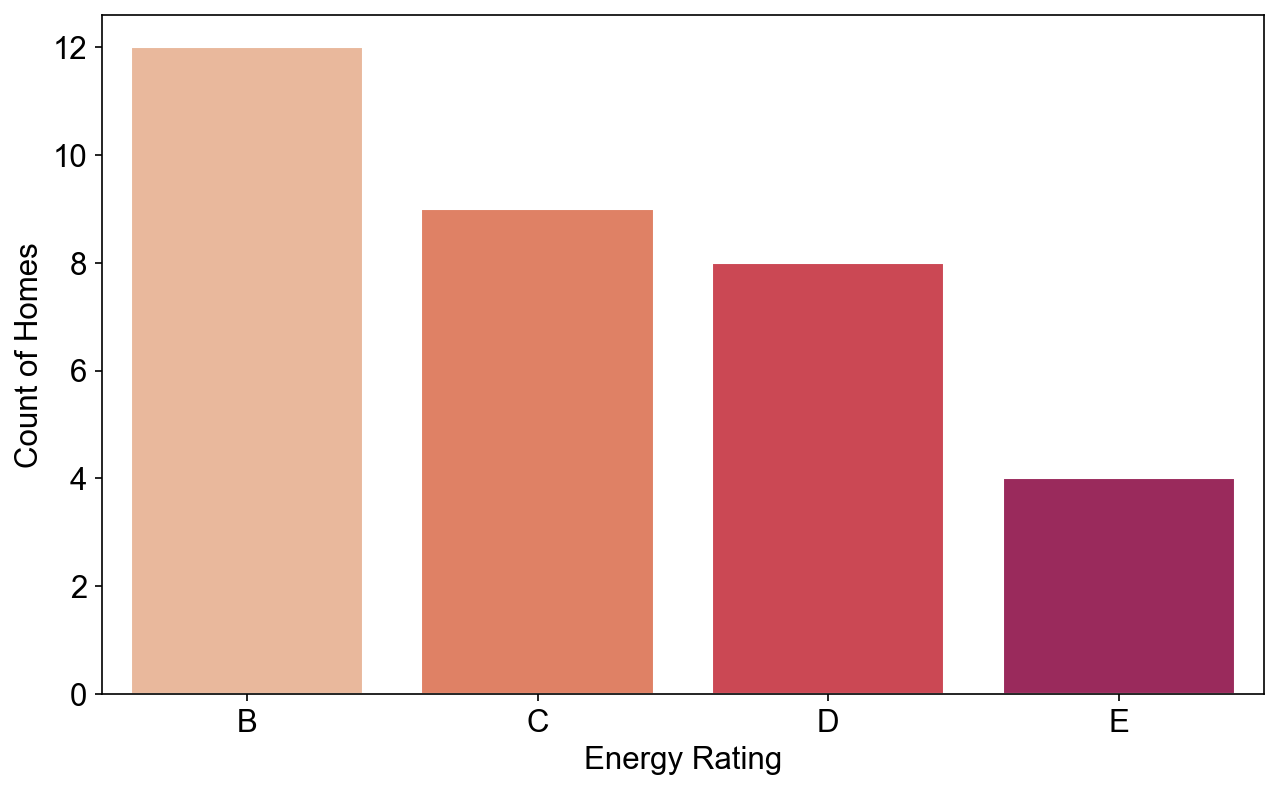

In [22]:
# countplot
fig, ax = plt.subplots(figsize=(10, 6),dpi=150)

sns.set_theme(style='whitegrid')
sns.countplot(data=temp_join,x='Current EPC Rating ',order=['B','C','D','E'], palette=palette)
ax.tick_params(axis='y',labelsize=15)
ax.tick_params(axis='x',labelsize=15)
ax.set_xlabel('Energy Rating',fontsize=15)
ax.set_ylabel('Count of Homes',fontsize=15)

In [23]:
temp_join['communal_heating'].value_counts()

No, I don't have communal heating                             15
Yes, I'm on communal heating but it turns off in summer        5
Yes, I'm on communal heating and yes it stays on in summer     5
Name: communal_heating, dtype: int64

Text(0, 0.5, 'Count of Homes')

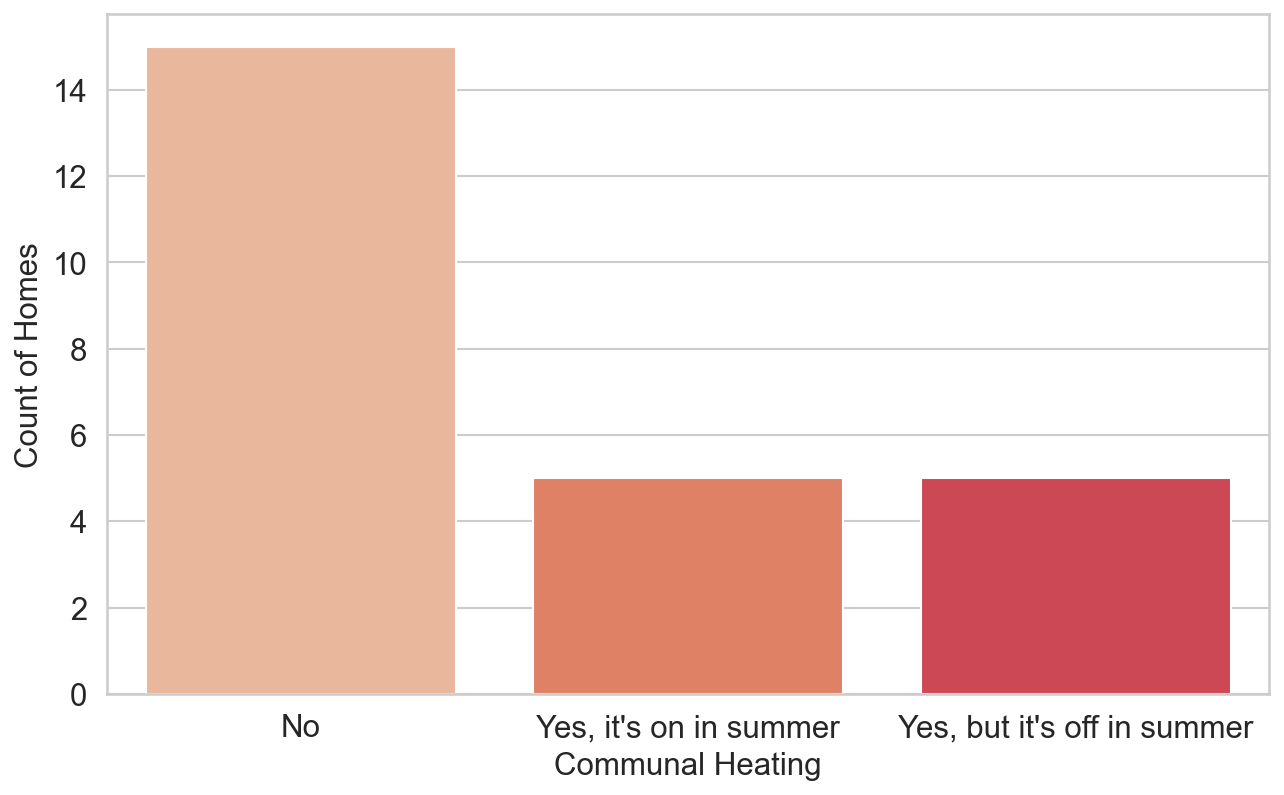

In [24]:
# countplot
fig, ax = plt.subplots(figsize=(10, 6),dpi=150)

sns.set_theme(style='whitegrid')
sns.countplot(data=temp_join,x='communal_heating', order=['No, I don\'t have communal heating','Yes, I\'m on communal heating and yes it stays on in summer','Yes, I\'m on communal heating but it turns off in summer'],palette=palette)
ax.tick_params(axis='y',labelsize=15)
ax.tick_params(axis='x',labelsize=15)
ax.set_xticklabels(labels=['No','Yes, it\'s on in summer','Yes, but it\'s off in summer'])
ax.set_xlabel('Communal Heating',fontsize=15)
ax.set_ylabel('Count of Homes',fontsize=15)

## EPC and communal heating 

In [27]:
temp_join.groupby('Current EPC Rating ')['communal_heating'].value_counts()

Current EPC Rating   communal_heating                                          
B                    No, I don't have communal heating                             5
                     Yes, I'm on communal heating and yes it stays on in summer    2
                     Yes, I'm on communal heating but it turns off in summer       2
C                    No, I don't have communal heating                             3
                     Yes, I'm on communal heating but it turns off in summer       1
D                    No, I don't have communal heating                             3
                     Yes, I'm on communal heating and yes it stays on in summer    3
E                    No, I don't have communal heating                             2
                     Yes, I'm on communal heating but it turns off in summer       1
Name: communal_heating, dtype: int64

In [36]:
temp_join_epc = temp_join.dropna(subset=["Current EPC Rating "])


In [37]:
temp_join_epc.shape

(33, 21)

In [40]:
temp_join_epc = temp_join_epc.sort_values(by="Current EPC Rating ")

<AxesSubplot: xlabel='Current EPC Rating ', ylabel='Count'>

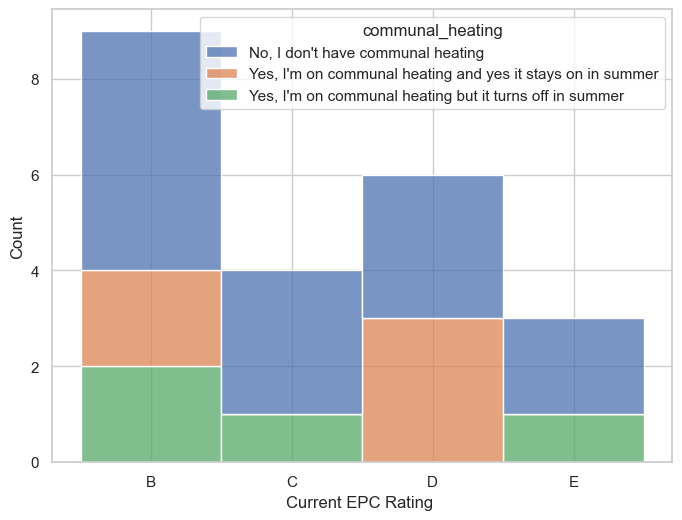

In [48]:
fig, ax = plt.subplots(figsize=(8, 6),dpi=100)
sns.histplot(binwidth=0.5, x="Current EPC Rating ", hue="communal_heating", data=temp_join_epc, stat="count", multiple="stack")

<ipython-input-47-46bd702f6883>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=['Yes - summer on','No','Yes - summer off'])


[Text(0, 0, 'Yes - summer on'),
 Text(1, 0, 'No'),
 Text(2, 0, 'Yes - summer off')]

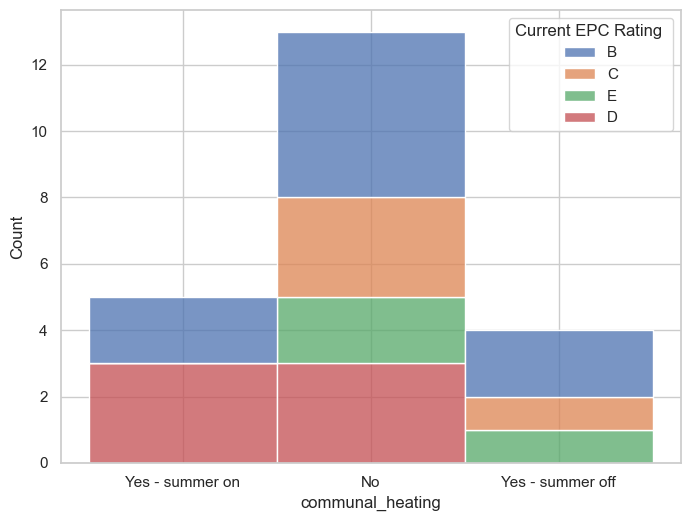

In [47]:
temp_join_ch = temp_join.dropna(subset=["communal_heating"])
fig, ax = plt.subplots(figsize=(8, 6),dpi=100)
sns.histplot(binwidth=0.5, x="communal_heating", hue="Current EPC Rating ", data=temp_join_ch, stat="count", multiple="stack")

ax.set_xticklabels(labels=['Yes - summer on','No','Yes - summer off'])

## ANOVA

#### Energy efficiency

In [89]:
for var in ['indoor_mean','indoor_max','indoor_min','indoor_var','indoor_std']:
    f_score = f_oneway(temp_join[temp_join['Current EPC Rating ']=='B'][var],temp_join[temp_join['Current EPC Rating ']=='C'][var],
                   temp_join[temp_join['Current EPC Rating ']=='D'][var],temp_join[temp_join['Current EPC Rating ']=='E'][var])
    print('f score of {} among energy efficiency groups is {}'.format(var,f_score))

f score of indoor_mean among energy efficiency groups is F_onewayResult(statistic=0.1992839314767218, pvalue=0.8960169242821967)
f score of indoor_max among energy efficiency groups is F_onewayResult(statistic=2.0938591511106885, pvalue=0.12276839591763096)
f score of indoor_min among energy efficiency groups is F_onewayResult(statistic=3.1691950466817467, pvalue=0.0391350763144506)
f score of indoor_var among energy efficiency groups is F_onewayResult(statistic=6.424372736335861, pvalue=0.0018011577960122698)
f score of indoor_std among energy efficiency groups is F_onewayResult(statistic=4.638048677763769, pvalue=0.009086241263271691)


In [90]:

for var in ['indoor_mean','indoor_max','indoor_min','indoor_var', 'indoor_std']:
    print(var)
    t, p = stats.ttest_ind(temp_join[temp_join['Current EPC Rating ']=='B'][var],temp_join[temp_join['Current EPC Rating ']=='C'][var])
    print('B and C is {},{}'.format(t,p))
    t, p = stats.ttest_ind(temp_join[temp_join['Current EPC Rating ']=='B'][var],temp_join[temp_join['Current EPC Rating ']=='D'][var])
    print('B and D is {},{}'.format(t,p))
    t, p = stats.ttest_ind(temp_join[temp_join['Current EPC Rating ']=='B'][var],temp_join[temp_join['Current EPC Rating ']=='E'][var])
    print('B and E is {},{}'.format(t,p))
    t, p = stats.ttest_ind(temp_join[temp_join['Current EPC Rating ']=='C'][var],temp_join[temp_join['Current EPC Rating ']=='D'][var])
    print('C and D is {},{}'.format(t,p))
    t, p = stats.ttest_ind(temp_join[temp_join['Current EPC Rating ']=='C'][var],temp_join[temp_join['Current EPC Rating ']=='E'][var])
    print('C and E is {},{}'.format(t,p))
    t, p = stats.ttest_ind(temp_join[temp_join['Current EPC Rating ']=='D'][var],temp_join[temp_join['Current EPC Rating ']=='E'][var])
    print('D and E is {},{}'.format(t,p))

indoor_mean
B and C is -0.29124633067203776,0.7740186169802904
B and D is -0.6489615648757735,0.5245576975564781
B and E is 0.3400959769468448,0.7388330867114976
C and D is -0.17573303959222122,0.8628540697022691
C and E is 0.4387017700222171,0.6693695992539941
D and E is 1.4396526047810057,0.18052598018528343
indoor_max
B and C is -0.7234166009336679,0.4782363671838443
B and D is -1.1741189678641217,0.25564834749138976
B and E is -3.0032225736003704,0.009490695445608559
C and D is -0.2648697708752338,0.7947149201615211
C and E is -1.5897286794792502,0.14020326697481958
D and E is -1.700594433990322,0.11985489324277887
indoor_min
B and C is -1.4801495508119753,0.1552248793813648
B and D is -1.5464942181916574,0.13938619445817743
B and E is 1.8498317074338373,0.08555721879222279
C and D is 0.2092636294374515,0.8370578964036777
C and E is 2.373370293076672,0.036931296113387
D and E is 3.6776782002738053,0.004262694787445774
indoor_var
B and C is -1.1020697184329973,0.2841964025901719
B a

#### Communal heating

In [27]:
for var in ['indoor_mean','indoor_max','indoor_min','indoor_var']:
    f_score = f_oneway(temp_join[temp_join['communal_heating']=='No, I don\'t have communal heating'][var],
                                 temp_join[temp_join['communal_heating']=='Yes, I\'m on communal heating but it turns off in summer'][var],
                   temp_join[temp_join['communal_heating']=='Yes, I\'m on communal heating and yes it stays on in summer'][var])
    print('f score of {} among communal heating groups is {}'.format(var,f_score))

f score of indoor_mean among communal heating groups is F_onewayResult(statistic=2.9377509470010015, pvalue=0.07399456786630249)
f score of indoor_max among communal heating groups is F_onewayResult(statistic=0.30574899601015487, pvalue=0.7396509251922141)
f score of indoor_min among communal heating groups is F_onewayResult(statistic=0.5008285088885714, pvalue=0.6127723106811208)
f score of indoor_var among communal heating groups is F_onewayResult(statistic=2.5402850169146496, pvalue=0.10172171393451651)


In [128]:
for var in ['indoor_mean','indoor_max','indoor_min','indoor_var','indoor_std']:
    print(var)
    t, p = stats.ttest_ind(temp_join[temp_join['communal_heating']=='No, I don\'t have communal heating'][var],
                           temp_join[temp_join['communal_heating']=='Yes, I\'m on communal heating and yes it stays on in summer'][var])
    print('No and Summer on is {}, {}'.format(t,p))

    t, p = stats.ttest_ind(temp_join[temp_join['communal_heating']=='No, I don\'t have communal heating'][var],
                           temp_join[temp_join['communal_heating']=='Yes, I\'m on communal heating but it turns off in summer'][var])
    print('No and Summer off is {}, {}'.format(t,p))

    t, p = stats.ttest_ind(temp_join[temp_join['communal_heating']=='Yes, I\'m on communal heating and yes it stays on in summer'][var],
                           temp_join[temp_join['communal_heating']=='Yes, I\'m on communal heating but it turns off in summer'][var])
    print('Summer on and Summer off is {}, {}'.format(t,p))

indoor_mean
No and Summer on is -2.809496343663699, 0.011598196983821913
No and Summer off is -1.2824156259568869, 0.21596691083509073
Summer on and Summer off is 0.6141168919023319, 0.5561949593620126
indoor_max
No and Summer on is 0.28631801620360314, 0.7779038786683614
No and Summer off is -0.6299983453516453, 0.5366118408309852
Summer on and Summer off is -0.7390150160732932, 0.48101579861997545
indoor_min
No and Summer on is -1.2209339318134191, 0.23786348866794257
No and Summer off is -0.37186911369367576, 0.7143319159798829
Summer on and Summer off is 0.3863654076893738, 0.7092991936693045
indoor_var
No and Summer on is 2.162755498908797, 0.04426566519955148
No and Summer off is -0.34285177904787195, 0.7356813721837574
Summer on and Summer off is -2.060583341452637, 0.07329355580202264
indoor_std
No and Summer on is 2.2718805291374644, 0.03559321790525926
No and Summer off is -0.37235929198484397, 0.7139732846717834
Summer on and Summer off is -2.32173900274981, 0.04878680675140

## Plots

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

B vs. E: t-test independent samples, P_val:9.491e-03 t=-3.003e+00


(array([0, 1, 2, 3]),
 [Text(0, 0, 'B'), Text(1, 0, 'C'), Text(2, 0, 'D'), Text(3, 0, 'E')])

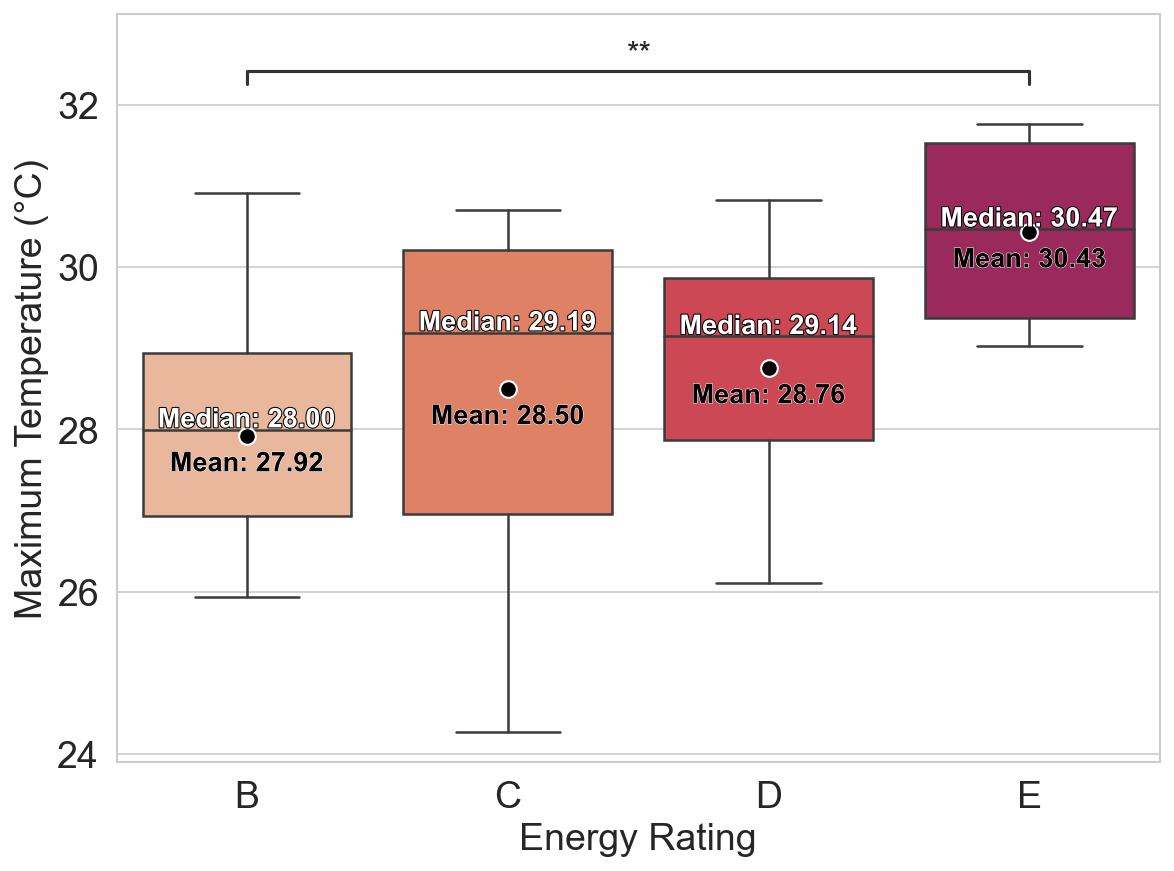

In [127]:
# Difference plot
# box plot
var='indoor_max'

fig, ax = plt.subplots(figsize=(8, 6),dpi=150)

sns.set_theme(style='whitegrid')
sns.set_context("paper", font_scale=1.6) 

# ax2 = ax.twinx()

box_plot=sns.boxplot(data=temp_join, x='Current EPC Rating ',y=var, order=['B','C','D','E'], palette=palette ,ax=ax,showmeans=True,
                     meanprops={'marker':'o',
                       'markerfacecolor':'black', 
                       'markeredgecolor':'white',
                       'markersize':'8'},zorder=2)

# sns.countplot(data=temp_join,x='Current EPC Rating ',order=['B','C','D','E'], color='tab:grey',ax=ax2,alpha=0.1,zorder=1)

fig.tight_layout()

# annotate mean
means = temp_join.groupby(['Current EPC Rating '])[var].mean()
vertical_offset = temp_join[var].mean() * 0.015 # offset from median for display

for xtick in box_plot.get_xticks():
    txt=box_plot.text(xtick,means[xtick] - vertical_offset,'Mean: {:.2f}'.format(means[xtick]), 
            horizontalalignment='center',size=13,color='black',weight='semibold',zorder=3)
    txt.set_path_effects([PathEffects.withStroke(linewidth=.5, foreground='w')])

# annotate median
medians = temp_join.groupby(['Current EPC Rating '])[var].median()
vertical_offset = temp_join[var].median() * 0.001 # offset from median for display

for xtick in box_plot.get_xticks():
    txt = box_plot.text(xtick,medians[xtick] + vertical_offset,'Median: {:.2f}'.format(medians[xtick]), 
            horizontalalignment='center',size=13,color='white',weight='semibold',zorder=4)
    txt.set_path_effects([PathEffects.withStroke(linewidth=1, foreground='black')])

# # statistical annotation with package
# add_stat_annotation(ax, data=temp_join, x='Current EPC Rating ', y=var, order=['B','C','D','E'],
#                     box_pairs=[("B", "C"), ("B", "D"), ("B", "E"),("C", "D"),("C", "E"),("D", "E")],
#                     comparisons_correction=None,text_format='star',test='t-test_ind', loc='inside', verbose=2,
#                     line_offset_to_box=0.05, line_offset=0.02, line_height=0.01, text_offset=2)
annot = Annotator(ax, [("B", "C"), ("B", "D"), ("B", "E"),("C", "D"),("C", "E"),("D", "E")], 
                  data=temp_join, x='Current EPC Rating ', y=var, order=['B','C','D','E'])
annot.configure(test='t-test_ind', text_format='star', comparisons_correction=None, loc='inside', verbose=2,
                hide_non_significant=True)
annot.apply_test()
ax, test_results = annot.annotate()


# plt.title('{} and Energy Rating'.format('Indoor Temperature'),fontsize=18)
ax.set_xlabel('Energy Rating',fontsize=18)
ax.set_ylabel('{} (°C)'.format('Maximum Temperature'),fontsize=18)
ax.tick_params(axis='y',labelsize=18)
ax.tick_params(axis='x',labelsize=18)

# ax2.set_ylabel('Count',fontsize=18,color='tab:grey')
# ax2.tick_params(axis='y',labelsize=18,labelcolor='tab:grey',color='tab:grey')
# ax2.set_xticklabels(labels=['Yes - summer on','No','Yes - summer off'])

plt.xticks(fontsize=18)
# plt.yticks(fontsize=15)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

No, I don't have communal heating vs. Yes, I'm on communal heating and yes it stays on in summer: t-test independent samples, P_val:1.160e-02 t=-2.809e+00


(array([0, 1, 2]),
 [Text(0, 0, 'No'),
  Text(1, 0, 'Yes - summer on'),
  Text(2, 0, 'Yes - summer off')])

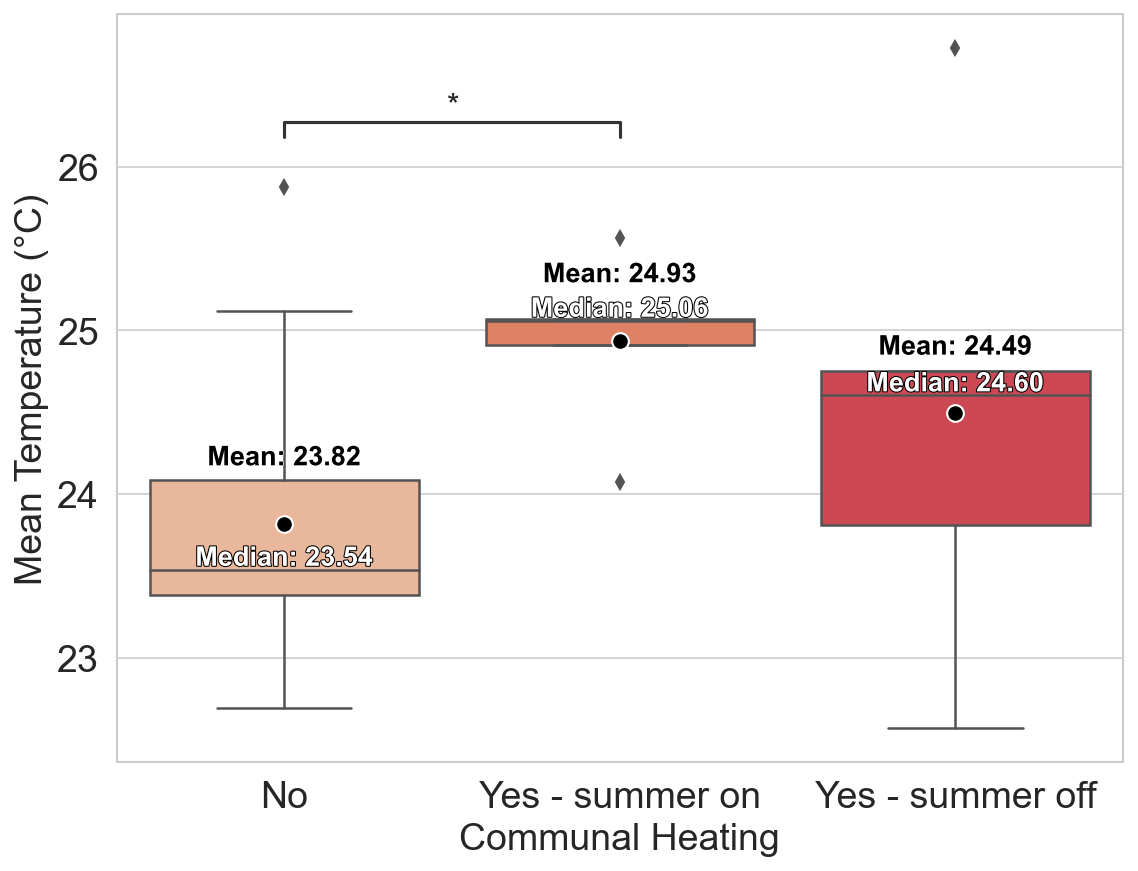

In [151]:
# Difference plot
# box plot
var='indoor_mean'
var_name = 'Mean Temperature'

col_no = 'No, I don\'t have communal heating'
col_summeron ='Yes, I\'m on communal heating and yes it stays on in summer'
col_summeroff = 'Yes, I\'m on communal heating but it turns off in summer'

fig, ax = plt.subplots(figsize=(9, 6),dpi=150)

sns.set_theme(style='whitegrid')
sns.set_context("paper", font_scale=1.6) 

box_plot=sns.boxplot(data=temp_join, x='communal_heating',y=var, order=[col_no, col_summeron,col_summeroff], palette=palette ,ax=ax,showmeans=True,
                     meanprops={'marker':'o',
                       'markerfacecolor':'black', 
                       'markeredgecolor':'white',
                       'markersize':'8'},zorder=2)

fig.tight_layout()

# annotate mean
means = temp_join.groupby(['communal_heating'])[var].mean()
vertical_offset = temp_join[var].mean() * 0.015 # offset from median for display

for xtick in box_plot.get_xticks():
    txt = box_plot.text(xtick,means[xtick] + vertical_offset,'Mean: {:.2f}'.format(means[xtick]), 
            horizontalalignment='center',size=13,color='black',weight='semibold',zorder=3)
    txt.set_path_effects([PathEffects.withStroke(linewidth=.5, foreground='w')])

# annotate median
medians = temp_join.groupby(['communal_heating'])[var].median()
vertical_offset = temp_join[var].median() * 0.001 # offset from median for display

for xtick in box_plot.get_xticks():
    txt = box_plot.text(xtick,medians[xtick] + vertical_offset,'Median: {:.2f}'.format(medians[xtick]), 
            horizontalalignment='center',size=13,color='w',weight='semibold',zorder=4)
    txt.set_path_effects([PathEffects.withStroke(linewidth=1, foreground='black')])

# # statistical annotation with package
# add_stat_annotation(ax, data=temp_join, x='Current EPC Rating ', y=var, order=['B','C','D','E'],
#                     box_pairs=[("B", "C"), ("B", "D"), ("B", "E"),("C", "D"),("C", "E"),("D", "E")],
#                     comparisons_correction=None,text_format='star',test='t-test_ind', loc='inside', verbose=2,
#                     line_offset_to_box=0.05, line_offset=0.02, line_height=0.01, text_offset=2)
annot = Annotator(ax, [(col_no, col_summeron), (col_no, col_summeroff), (col_summeron, col_summeroff)], 
                  data=temp_join, x='communal_heating', y=var, order=[col_no, col_summeron,col_summeroff])
annot.configure(test='t-test_ind', text_format='star', comparisons_correction=None, loc='inside', verbose=2,
                hide_non_significant=True)
annot.apply_test()
ax, test_results = annot.annotate()


# plt.title('{} and Energy Rating'.format('Indoor Temperature'),fontsize=18)
ax.set_xlabel('Communal Heating',fontsize=18)
ax.set_ylabel('{} (°C)'.format(var_name),fontsize=18)
ax.tick_params(axis='y',labelsize=18)
ax.tick_params(axis='x',labelsize=18)

ax.set_xticklabels(labels=['No','Yes - summer on','Yes - summer off'])

plt.xticks(fontsize=18)
# plt.yticks(fontsize=15)

## Calculate hourly data and put temp diff in a dict

In [8]:
# Filter hourly data and groupby (station)
station_limbo.head()
station_limbo['hourly_time'] = station_limbo['Report Date / Time'].apply(lambda x: str(x)[:-6]+'h')

station_hour = station_limbo.groupby('hourly_time').agg({'Air Temperature': ['mean', 'min', 'max']})

In [9]:
# Filter hourly data and groupby (sensors)
for index in sensors_data:
    sensors_data[index]['time'] = sensors_data[index].index
    sensors_data[index]['hourly_time'] = sensors_data[index]['time'].apply(lambda x: str(x)[:-6]+'h')

sensors_data_hour = {}

for index in sensors_data:
    sensors_data_hour[index] = sensors_data[index].groupby('hourly_time').agg({'TEMP': ['mean', 'min', 'max']})

In [10]:
# Combine station and sensors data in a dataframe
compare_data_hour = {}

for index in sensors_data_hour:
    compare_data_hour[index] = sensors_data_hour[index].join(station_hour,how='left')

    compare_data_hour[index] = compare_data_hour[index].set_axis(['Indoor_Mean', 'Indoor_Min', 'Indoor_Max', 'Outdoor_Mean','Outdoor_Min','Outdoor_Max'], axis=1)
    
    compare_data_hour[index]['Date_hour'] = compare_data_hour[index].index

    compare_data_hour[index]['Date'] = compare_data_hour[index]['Date_hour'].apply(lambda x: x[:-4])
    compare_data_hour[index]['Hour'] = compare_data_hour[index]['Date_hour'].apply(lambda x: x[-4:])


    compare_data_hour[index] = compare_data_hour[index].reset_index()
    compare_data_hour[index]['hourly_time'] = pd.to_datetime(compare_data_hour[index]['hourly_time'])

    compare_data_hour[index] = compare_data_hour[index].set_index('hourly_time',drop=False)

    compare_data_hour[index]['mean_diff'] = compare_data_hour[index]['Indoor_Mean'] - compare_data_hour[index]['Outdoor_Mean']
    compare_data_hour[index]['min_diff'] = compare_data_hour[index]['Indoor_Min'] - compare_data_hour[index]['Outdoor_Min']
    compare_data_hour[index]['max_diff'] = compare_data_hour[index]['Indoor_Max'] - compare_data_hour[index]['Outdoor_Max']

## Top/bottom households

In [11]:
# Top 5 Household with the biggest difference of home and weather station temperature?
# calculate absolute value
for index in sensors_data_hour:
    compare_data_hour[index]['mean_diff_abs'] = compare_data_hour[index]['mean_diff'].abs()
    compare_data_hour[index]['min_diff_abs'] = compare_data_hour[index]['min_diff'].abs()
    compare_data_hour[index]['max_diff_abs'] = compare_data_hour[index]['max_diff'].abs()

## Plot temperature difference

### Overall plot - hourly data (absolute/group)

In [12]:
# # Plot with absolute temperature difference
# # plot 1
# %matplotlib inline

# def plot_tempdiff_0(ID):
#     # Plot difference between station and sensor data
#     fig, ax1 = plt.subplots(figsize=(12, 6),dpi=150)
#     sns.set_style('whitegrid')

#     # barplot
#     ax1.bar(compare_data_hour[ID]['hourly_time'], compare_data_hour[ID]['mean_diff_abs'], 
#             width=0.05, color = 'grey',  linewidth=0.1, label='Temperature difference')
    
#     # heatwave period
#     heatwave_start_date = pd.to_datetime('2023-09-04')
#     heatwave_end_date = pd.to_datetime('2023-09-10')
    
#     ax1.fill_between(compare_data_hour[ID]['hourly_time'],compare_data_hour[ID]['mean_diff_abs'].min(), 
#     compare_data_hour[ID]['mean_diff_abs'].max(), 
#     where=(compare_data_hour[ID]['hourly_time'] >= heatwave_start_date) & (compare_data_hour[ID]['hourly_time'] <= heatwave_end_date), 
#     color='yellow', alpha=0.1, label='Heatwave Period')

#     heatwave_text = 'Heatwave Period: \n2023-09-04 to 2023-09-10'
#     ax1.text(heatwave_start_date + pd.DateOffset(days=0), compare_data_hour[ID]['mean_diff_abs'].min(), heatwave_text, fontsize=10, color='#884C3A',alpha=1)

#     # set axis and labels
#     ax1.xaxis.set_major_locator(mdates.RRuleLocator(mdates.rrulewrapper(mdates.DAILY, interval=2)))
#     plt.xticks(rotation=45, ha='right')
#     plt.xlabel('Date',fontsize=12)
#     plt.ylabel('Absolute temperature difference (°C)',fontsize=12)
#     plt.title('Temperature Difference between Indoor and Outdoor from Sensor {} (EPC:{})'.format(ID,sensor_id.loc[ID,'energy_rating']),
#               fontsize=15)

#     plt.tight_layout()
#     plt.savefig('Figure_temp_diff/{}_abs.png'.format(ID))


# for id in sensor_id.index:
#     if id == 'BL007-100':
#         continue
#     plot_tempdiff_0(id)

In [13]:
# # Plot 2
# # define heatwave period
# heatwave_start_date = pd.to_datetime('2023-09-04')
# heatwave_end_date = pd.to_datetime('2023-09-10')

# import matplotlib.pyplot as plt

# def plot_tempdiff_group (ID):
#     # Set the figure size and style
#     fig, ax1 = plt.subplots(figsize=(12, 6),dpi=150)
#     sns.set(style="whitegrid")

#     # Create a new column 'day' to group the data by day
#     compare_data_hour[ID]['day'] = compare_data_hour[ID]['hourly_time'].dt.date

#     # Create a box plot
#     sns.boxplot(data=compare_data_hour[ID], x='day', y='mean_diff_abs', boxprops={"facecolor": (.3, .5, .7, .5)},
#         medianprops={"color": "r", "linewidth": 2})

#     compare_data_hour[ID]['day'] = pd.to_datetime(compare_data_hour[ID]['day'])
#     if compare_data_hour[ID]['day'][-1] >= heatwave_start_date:
#         start_unit = (heatwave_start_date-compare_data_hour[ID]['day'][0]).days
#         end_unit = min(start_unit+6, (compare_data_hour[ID]['day'][-1]-compare_data_hour[ID]['day'][0]).days)
#         plt.axvspan(start_unit-0.5, end_unit+0.5, color='red', alpha=0.2, label='Heatwave period \n2023-09-04 to 2023-09-10')

#         plt.legend(loc='upper left')

#     # Rotate x-axis labels for readability
#     plt.xticks(rotation=45,ha='right')

#     # Set axis labels and plot title
#     plt.xlabel('Date',fontsize=15)
#     plt.ylabel('Absolute temperature difference (°C)',fontsize=15)
#     plt.title('Temperature Difference between Indoor and Outdoor from Sensor {} (EPC:{})'.format(ID,sensor_id.loc[ID,'energy_rating']),
#                 fontsize=15)

#     plt.tight_layout()
#     plt.savefig('Figure_temp_diff/{}_group.png'.format(ID))

# for id in sensor_id.index:
#     if id == 'BL007-100':
#         continue
#     plot_tempdiff_group(id)

### Various temperature values (mean, max, heatwave, night, day, variation, etc.)

In [14]:
# Top 5 households with largest temp diff across all time
# Mean tempdiff 
mean_tempdiff = {}

# define heatwave and day/night time
heatwave_start_date = pd.to_datetime('2023-09-04')
heatwave_end_date = pd.to_datetime('2023-09-11')

sunrise = 6
sunset = 20

# Filter heatwave period, daytime, nighttime
for index in compare_data_hour:
    df = compare_data_hour[index]
    heatwave_df = df.loc[(df['hourly_time']>=heatwave_start_date) & (df['hourly_time']<=heatwave_end_date),:]
    day_df = df[(df.index.hour >= sunrise) & (df.index.hour < sunset)]
    night_df = df[(df.index.hour < sunrise) | (df.index.hour >= sunset)]
    heatwave_day_df = heatwave_df[(heatwave_df.index.hour >= sunrise) & (heatwave_df.index.hour < sunset)]
    heatwave_night_df = heatwave_df[(heatwave_df.index.hour < sunrise) | (heatwave_df.index.hour >= sunset)]

    mean_tempdiff[index] = [df['Indoor_Mean'].mean(), df['Indoor_Mean'].max(), df['Indoor_Mean'].min(), df['mean_diff_abs'].mean(), sensors_data[index]['TEMP'].var(),heatwave_df['mean_diff_abs'].mean(), day_df['mean_diff_abs'].mean(), 
    night_df['mean_diff_abs'].mean(), heatwave_day_df['mean_diff_abs'].mean(), heatwave_night_df['mean_diff_abs'].mean(),
    df['max_diff_abs'].mean(), heatwave_df['max_diff_abs'].mean(), day_df['max_diff_abs'].mean(), 
    night_df['max_diff_abs'].mean(), heatwave_day_df['max_diff_abs'].mean(), heatwave_night_df['max_diff_abs'].mean()]

tempdiff_all = pd.DataFrame.from_dict(mean_tempdiff,orient='index',columns=['indoor_mean','indoor_max','indoor_min', 'mean','var_household','heatwave_mean','day_mean','night_mean','hday_mean','hnight_mean',
'max','heatwave_max','day_max','night_max','hday_max','hnight_max'])

In [15]:
tempdiff_all.describe()

,indoor_mean,indoor_max,indoor_min,mean,var_household,heatwave_mean,day_mean,night_mean,hday_mean,hnight_mean,max,heatwave_max,day_max,night_max,hday_max,hnight_max
count,40.000000,40.000000,40.000000,40.000000,40.000000,36.000000,40.000000,40.000000,36.000000,36.000000,40.000000,36.000000,40.000000,40.000000,36.000000,36.000000
mean,23.960660,28.934223,20.200842,4.669482,3.330030,4.179925,3.293697,6.641799,3.245859,5.511964,4.520940,4.206590,3.148289,6.489071,3.394610,5.362970
std,1.262579,3.166473,1.619330,0.999701,2.850103,0.489707,0.774509,1.428564,0.469113,1.413545,0.915187,0.421468,0.669757,1.414766,0.611987,1.406078
min,21.729336,24.161667,17.195500,3.192146,0.617271,3.285863,2.269931,4.100195,2.509372,2.979846,3.262730,3.431386,2.321405,3.953724,2.492551,2.853433
25%,23.141979,27.068917,19.020375,4.071156,1.827049,3.793500,2.730770,5.600827,2.977917,4.450274,3.938134,3.935316,2.723410,5.524221,2.963648,4.311765
50%,23.832103,28.809667,20.109000,4.434080,2.974270,4.175488,3.042559,6.394306,3.132817,5.407395,4.299072,4.201657,2.918701,6.275754,3.185102,5.250022
75%,24.666208,29.758971,21.331083,5.250663,3.456567,4.484413,3.586034,7.748283,3.422464,6.454425,5.034677,4.461322,3.391960,7.576741,3.721312,6.300143
max,27.095870,45.402500,24.282167,7.774953,18.951923,5.262481,5.991612,10.021500,4.344420,8.239909,7.441552,5.119940,5.562371,9.808831,4.747041,8.066765


### Join weather with survey data

In [16]:
# Read survey data
survey = pd.read_excel('TBIJ-Survey1.xlsx',sheet_name='Heatwave',header=2)
survey = survey.set_index('ID')

In [17]:
# Join tempdiff with other variables
# tempdiff_join = tempdiff_all.sort_values('mean',ascending=False)
tempdiff_join = tempdiff_all.join(sensor_id,how='left')
tempdiff_join = tempdiff_join.join(survey[['communal_heating','breeze']],how='left')

In [18]:
tempdiff_join.head()

,indoor_mean,indoor_max,indoor_min,mean,var_household,heatwave_mean,day_mean,night_mean,hday_mean,hnight_mean,...,end_date,end_time,longitude,latitude,house_type,energy_rating,start_datetime,end_datetime,communal_heating,breeze
BL007-02,24.415756,30.197667,20.586833,4.762674,4.075541,4.334480,3.343364,6.847643,2.935411,6.380879,...,2023-09-13,15:49:06,-0.09012,51.49352,Terraced house,D,2023-08-04 18:01:11,2023-09-13 15:49:06,NaN,NaN
BL007-04,25.563244,28.832167,20.863000,6.064357,1.603682,4.636574,4.249319,8.604666,3.090394,6.770740,...,2023-09-15,15:07:00,-0.07452,51.47990,"Flat/apartment (high-rise on a low floor, or l...",B,2023-07-28 19:42:00,2023-09-15 15:07:00,"Yes, I'm on communal heating and yes it stays ...",No
BL007-07,23.537122,28.270333,20.068500,4.223765,3.084647,3.845956,2.837107,6.229084,2.992085,5.076534,...,2023-09-14,23:00:00,-0.07333,51.47997,Terraced house,C,2023-08-04 19:27:00,2023-09-14 23:00:00,"No, I don't have communal heating",Yes
BL007-09,25.730276,30.363000,22.074833,5.856633,2.875995,4.977288,4.156549,8.355713,3.099980,7.682821,...,2023-09-13,19:30:00,-0.08680,51.47774,Duplex Terraced maisonette on top of a ro,C,2023-08-04 17:18:00,2023-09-13 19:30:00,NaN,NaN
BL007-13,25.061454,28.741667,19.417500,5.547907,1.924454,4.362318,3.976751,7.843938,3.048866,6.255233,...,2023-09-19,15:23:00,-0.08988,51.47947,"Flat/apartment (high-rise on a low floor, or l...",B,2023-08-04 17:36:00,2023-09-19 15:23:00,"Yes, I'm on communal heating and yes it stays ...",No


In [19]:
tempdiff_join.nlargest(7,'mean')

,indoor_mean,indoor_max,indoor_min,mean,var_household,heatwave_mean,day_mean,night_mean,hday_mean,hnight_mean,...,end_date,end_time,longitude,latitude,house_type,energy_rating,start_datetime,end_datetime,communal_heating,breeze
BL007-28,26.739143,30.015882,23.557667,7.774953,3.424291,NaN,5.991612,10.021500,NaN,NaN,...,2023-08-15,04:11:13,-0.05770,51.47592,ground first and im in the second floor.,C,2023-08-06 15:45:00,2023-08-15 04:11:13,"Yes, I'm on communal heating but it turns off ...",No
BL007-36,27.095870,30.103833,24.282167,7.091803,1.651522,5.262481,5.136747,9.922896,3.196511,8.239909,...,2023-09-13,18:50:00,-0.07197,51.47489,Terraced house,C,2023-08-04 19:59:00,2023-09-13 18:50:00,NaN,NaN
BL007-04,25.563244,28.832167,20.863000,6.064357,1.603682,4.636574,4.249319,8.604666,3.090394,6.770740,...,2023-09-15,15:07:00,-0.07452,51.47990,"Flat/apartment (high-rise on a low floor, or l...",B,2023-07-28 19:42:00,2023-09-15 15:07:00,"Yes, I'm on communal heating and yes it stays ...",No
BL007-48,25.876278,30.773167,22.629833,5.984607,2.928068,4.902777,4.395918,8.302595,3.047664,7.576323,...,2023-09-12,18:30:00,-0.10682,51.47988,"Flat/apartment (high-rise, on a mid to high fl...",B,2023-08-01 17:38:01,2023-09-12 18:30:00,"No, I don't have communal heating",No
BL007-09,25.730276,30.363000,22.074833,5.856633,2.875995,4.977288,4.156549,8.355713,3.099980,7.682821,...,2023-09-13,19:30:00,-0.08680,51.47774,Duplex Terraced maisonette on top of a ro,C,2023-08-04 17:18:00,2023-09-13 19:30:00,NaN,NaN
BL007-47,25.100365,29.549000,21.749333,5.593163,2.917217,4.938439,3.824106,8.170103,3.294583,7.307527,...,2023-09-19,17:42:51,-0.10257,51.48641,"Flat/apartment (high-rise, on a mid to high fl...",D,2023-08-04 18:29:00,2023-09-19 17:42:51,"No, I don't have communal heating",Yes
BL007-13,25.061454,28.741667,19.417500,5.547907,1.924454,4.362318,3.976751,7.843938,3.048866,6.255233,...,2023-09-19,15:23:00,-0.08988,51.47947,"Flat/apartment (high-rise on a low floor, or l...",B,2023-08-04 17:36:00,2023-09-19 15:23:00,"Yes, I'm on communal heating and yes it stays ...",No


In [20]:
tempdiff_join.nsmallest(7,'mean')

,indoor_mean,indoor_max,indoor_min,mean,var_household,heatwave_mean,day_mean,night_mean,hday_mean,hnight_mean,...,end_date,end_time,longitude,latitude,house_type,energy_rating,start_datetime,end_datetime,communal_heating,breeze
BL007-67,21.799652,26.368000,19.039167,3.192146,2.108689,3.511650,2.578988,4.100195,3.875230,2.979846,...,2023-09-14,17:58:00,-0.08455,51.47925,Terraced house,C,2023-08-08 19:36:00,2023-09-14 17:58:00,NaN,NaN
BL007-42,21.820777,26.984833,17.340000,3.281472,3.452849,3.832250,2.683496,4.155566,4.032118,3.544206,...,2023-09-14,17:15:00,-0.08144,51.48752,"Flat/apartment (high-rise on a low floor, or l...",NaN,2023-08-08 20:30:00,2023-09-14 17:15:00,NaN,NaN
BL007-59,22.567183,26.997167,18.504500,3.287939,2.917552,3.285863,2.269931,4.802669,3.247883,3.340598,...,2023-09-14,19:16:04,-0.09769,51.49401,"Flat/apartment (high-rise, on a mid to high fl...",B,2023-08-06 11:56:00,2023-09-14 19:16:04,"Yes, I'm on communal heating but it turns off ...",No
BL007-32,21.729336,25.898000,18.964000,3.408070,1.838766,3.716845,2.685379,4.460468,4.199087,3.021848,...,2023-09-16,12:55:00,-0.09175,51.48479,"Flat/apartment (high-rise, on a mid to high fl...",B,2023-08-01 08:23:00,2023-09-16 12:55:00,NaN,NaN
BL007-66,23.131993,28.646333,19.361333,3.636635,4.318939,3.709876,2.450765,5.350263,2.864064,4.947035,...,2023-09-14,10:58:03,-0.09437,51.49109,Terraced house,D,2023-08-06 18:35:00,2023-09-14 10:58:03,"No, I don't have communal heating",Yes
BL007-57,22.568430,27.092833,19.581333,3.647147,2.668632,3.835368,2.762465,4.948017,3.747155,3.964396,...,2023-09-17,20:00:49,-0.09476,51.49618,"Flat/apartment (high-rise, on a mid to high fl...",NaN,2023-08-06 16:52:00,2023-09-17 20:00:49,NaN,NaN
BL007-39,22.079309,26.923167,18.474167,3.668954,3.050535,3.695065,2.641481,5.177546,3.398682,4.122206,...,2023-09-26,19:25:13,-0.08282,51.47509,"Flat/apartment (high-rise, on a mid to high fl...",C,2023-08-04 15:56:59,2023-09-26 19:25:13,NaN,NaN


## Statistical test

### Energy rating

#### energy rating and indoor mean temp

In [21]:
# Anova for energy rating and indoor max temperature in each household
print(f_oneway(tempdiff_join[tempdiff_join['energy_rating']=='B']['indoor_mean'],tempdiff_join[tempdiff_join['energy_rating']=='C']['indoor_mean'],
tempdiff_join[tempdiff_join['energy_rating']=='D']['indoor_mean'],tempdiff_join[tempdiff_join['energy_rating']=='E']['indoor_mean']),'\n')

F_onewayResult(statistic=0.21214671383478884, pvalue=0.8871620170007861) 



#### energy rating and indoor max temp

In [25]:
# Anova for energy rating and indoor max temperature in each household
print(f_oneway(tempdiff_join[tempdiff_join['energy_rating']=='B']['indoor_max'],tempdiff_join[tempdiff_join['energy_rating']=='C']['indoor_max'],
tempdiff_join[tempdiff_join['energy_rating']=='D']['indoor_max'],tempdiff_join[tempdiff_join['energy_rating']=='E']['indoor_max']),'\n')

F_onewayResult(statistic=3.0801239430510727, pvalue=0.04292531391555199) 



In [41]:
# T test
t, p = stats.ttest_ind(tempdiff_join[tempdiff_join['energy_rating']=='B']['indoor_max'],tempdiff_join[tempdiff_join['energy_rating']=='E']['indoor_max'])
print('T test for energy rating B and E is {}, {}'.format(t,p))

t, p = stats.ttest_ind(tempdiff_join[tempdiff_join['energy_rating']=='C']['indoor_max'],tempdiff_join[tempdiff_join['energy_rating']=='E']['indoor_max'])
print('T test for energy rating C and E is {}, {}'.format(t,p))

t, p = stats.ttest_ind(tempdiff_join[tempdiff_join['energy_rating']=='D']['indoor_max'],tempdiff_join[tempdiff_join['energy_rating']=='E']['indoor_max'])
print('T test for energy rating D and E is {}, {}'.format(t,p))

t, p = stats.ttest_ind(tempdiff_join[tempdiff_join['energy_rating']=='C']['indoor_max'],tempdiff_join[tempdiff_join['energy_rating']=='D']['indoor_max'])
print('T test for energy rating C and D is {}, {}'.format(t,p))

t, p = stats.ttest_ind(tempdiff_join[tempdiff_join['energy_rating']=='B']['indoor_max'],tempdiff_join[tempdiff_join['energy_rating']=='D']['indoor_max'])
print('T test for energy rating B and D is {}, {}'.format(t,p))

t, p = stats.ttest_ind(tempdiff_join[tempdiff_join['energy_rating']=='B']['indoor_max'],tempdiff_join[tempdiff_join['energy_rating']=='C']['indoor_max'])
print('T test for energy rating B and C is {}, {}'.format(t,p))

T test for energy rating B and E is -3.19690882115298, 0.006460133484735277
T test for energy rating C and E is -1.80988324033831, 0.09769025372651108
T test for energy rating D and E is -1.4659514720234859, 0.17338703209909204
T test for energy rating C and D is -0.9155632623550249, 0.3743806761164187
T test for energy rating B and D is -2.107154280831191, 0.049392810523079485
T test for energy rating B and C is -0.7824756859039201, 0.44357855265004287


#### energy rating and indoor min temp

In [22]:
# Anova for energy rating and indoor max temperature in each household
print(f_oneway(tempdiff_join[tempdiff_join['energy_rating']=='B']['indoor_min'],tempdiff_join[tempdiff_join['energy_rating']=='C']['indoor_min'],
tempdiff_join[tempdiff_join['energy_rating']=='D']['indoor_min'],tempdiff_join[tempdiff_join['energy_rating']=='E']['indoor_min']),'\n')

F_onewayResult(statistic=3.2158965337216725, pvalue=0.03728998520122982) 



In [23]:
# T test
t, p = stats.ttest_ind(tempdiff_join[tempdiff_join['energy_rating']=='B']['indoor_min'],tempdiff_join[tempdiff_join['energy_rating']=='E']['indoor_min'])
print('T test for energy rating B and E is {}, {}'.format(t,p))

t, p = stats.ttest_ind(tempdiff_join[tempdiff_join['energy_rating']=='C']['indoor_min'],tempdiff_join[tempdiff_join['energy_rating']=='E']['indoor_min'])
print('T test for energy rating C and E is {}, {}'.format(t,p))

t, p = stats.ttest_ind(tempdiff_join[tempdiff_join['energy_rating']=='D']['indoor_min'],tempdiff_join[tempdiff_join['energy_rating']=='E']['indoor_min'])
print('T test for energy rating D and E is {}, {}'.format(t,p))

t, p = stats.ttest_ind(tempdiff_join[tempdiff_join['energy_rating']=='C']['indoor_min'],tempdiff_join[tempdiff_join['energy_rating']=='D']['indoor_min'])
print('T test for energy rating C and D is {}, {}'.format(t,p))

t, p = stats.ttest_ind(tempdiff_join[tempdiff_join['energy_rating']=='B']['indoor_min'],tempdiff_join[tempdiff_join['energy_rating']=='D']['indoor_min'])
print('T test for energy rating B and D is {}, {}'.format(t,p))

t, p = stats.ttest_ind(tempdiff_join[tempdiff_join['energy_rating']=='B']['indoor_min'],tempdiff_join[tempdiff_join['energy_rating']=='C']['indoor_min'])
print('T test for energy rating B and C is {}, {}'.format(t,p))

T test for energy rating B and E is 2.0261540140010004, 0.06224221468567191
T test for energy rating C and E is 2.3935412170562174, 0.03563747503365922
T test for energy rating D and E is 3.677933947684522, 0.004260894378436462
T test for energy rating C and D is 0.2182120494587217, 0.8302048026725748
T test for energy rating B and D is -1.484366804832333, 0.1550128603796731
T test for energy rating B and C is -1.4324874765466353, 0.16825257417015207


#### energy rating and variance

In [40]:
# Anova for energy rating variance in each household
print(f_oneway(tempdiff_join[tempdiff_join['energy_rating']=='B']['var_household'],tempdiff_join[tempdiff_join['energy_rating']=='C']['var_household'],
tempdiff_join[tempdiff_join['energy_rating']=='D']['var_household'],tempdiff_join[tempdiff_join['energy_rating']=='E']['var_household']),'\n')

# Turkey HSD
res_var_ee = tukey_hsd(tempdiff_join[tempdiff_join['energy_rating']=='B']['var_household'],tempdiff_join[tempdiff_join['energy_rating']=='C']['var_household'],
tempdiff_join[tempdiff_join['energy_rating']=='D']['var_household'],tempdiff_join[tempdiff_join['energy_rating']=='E']['var_household'])

print(res_var_ee)

# T test
t, p = stats.ttest_ind(tempdiff_join[tempdiff_join['energy_rating']=='B']['var_household'],tempdiff_join[tempdiff_join['energy_rating']=='E']['var_household'])
print('T test for energy rating B and E is {}, {}'.format(t,p))

t, p = stats.ttest_ind(tempdiff_join[tempdiff_join['energy_rating']=='C']['var_household'],tempdiff_join[tempdiff_join['energy_rating']=='E']['var_household'])
print('T test for energy rating C and E is {}, {}'.format(t,p))

t, p = stats.ttest_ind(tempdiff_join[tempdiff_join['energy_rating']=='D']['var_household'],tempdiff_join[tempdiff_join['energy_rating']=='E']['var_household'])
print('T test for energy rating D and E is {}, {}'.format(t,p))

t, p = stats.ttest_ind(tempdiff_join[tempdiff_join['energy_rating']=='C']['var_household'],tempdiff_join[tempdiff_join['energy_rating']=='D']['var_household'])
print('T test for energy rating C and D is {}, {}'.format(t,p))

t, p = stats.ttest_ind(tempdiff_join[tempdiff_join['energy_rating']=='B']['var_household'],tempdiff_join[tempdiff_join['energy_rating']=='D']['var_household'])
print('T test for energy rating B and D is {}, {}'.format(t,p))

t, p = stats.ttest_ind(tempdiff_join[tempdiff_join['energy_rating']=='B']['var_household'],tempdiff_join[tempdiff_join['energy_rating']=='C']['var_household'])
print('T test for energy rating B and C is {}, {}'.format(t,p))

F_onewayResult(statistic=6.6606510668672, pvalue=0.0014715425739399133) 

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.429     0.819    -1.767     0.909
 (0 - 2)     -0.877     0.329    -2.262     0.507
 (0 - 3)     -2.822     0.001    -4.574    -1.070
 (1 - 0)      0.429     0.819    -0.909     1.767
 (1 - 2)     -0.449     0.840    -1.923     1.026
 (1 - 3)     -2.393     0.006    -4.216    -0.570
 (2 - 0)      0.877     0.329    -0.507     2.262
 (2 - 1)      0.449     0.840    -1.026     1.923
 (2 - 3)     -1.945     0.038    -3.802    -0.087
 (3 - 0)      2.822     0.001     1.070     4.574
 (3 - 1)      2.393     0.006     0.570     4.216
 (3 - 2)      1.945     0.038     0.087     3.802

T test for energy rating B and E is -5.919294819614423, 3.740924503366758e-05
T test for energy rating C and E is -3.919395786166061, 0.0023953239244316866
T test for energy rating D and E is -2.062423403501

#### energy rating and temp diff

In [142]:
# Anova for energy ratings
print(f_oneway(tempdiff_join[tempdiff_join['energy_rating']=='B']['mean'],tempdiff_join[tempdiff_join['energy_rating']=='C']['mean'],
tempdiff_join[tempdiff_join['energy_rating']=='D']['mean'],tempdiff_join[tempdiff_join['energy_rating']=='E']['mean']))

print(f_oneway(tempdiff_join.loc[(tempdiff_join['energy_rating']!='D') & (tempdiff_join['energy_rating']!='E'),'mean'],
tempdiff_join.loc[(tempdiff_join['energy_rating']!='B') & (tempdiff_join['energy_rating']!='C'),'mean']))

# E vs. other ratings
print(f_oneway(tempdiff_join.loc[tempdiff_join['energy_rating']!='E','mean'],
tempdiff_join.loc[(tempdiff_join['energy_rating']!='D') & (tempdiff_join['energy_rating']!='B') & (tempdiff_join['energy_rating']!='C'),'mean']))

# Turkey HSD
res_ee = tukey_hsd(tempdiff_join[tempdiff_join['energy_rating']=='B']['mean'],tempdiff_join[tempdiff_join['energy_rating']=='C']['mean'],
tempdiff_join[tempdiff_join['energy_rating']=='D']['mean'],tempdiff_join[tempdiff_join['energy_rating']=='E']['mean'])

print(res_ee)

# T test
t, p = stats.ttest_ind(tempdiff_join[tempdiff_join['energy_rating']=='B']['mean'],tempdiff_join[tempdiff_join['energy_rating']=='C']['mean'])
print(t,p)
t, p = stats.ttest_ind(tempdiff_join[tempdiff_join['energy_rating']=='B']['mean'],tempdiff_join[tempdiff_join['energy_rating']=='D']['mean'])
print(t,p)
t, p = stats.ttest_ind(tempdiff_join[tempdiff_join['energy_rating']=='B']['mean'],tempdiff_join[tempdiff_join['energy_rating']=='E']['mean'])
print(t,p)
t, p = stats.ttest_ind(tempdiff_join[tempdiff_join['energy_rating']=='C']['mean'],tempdiff_join[tempdiff_join['energy_rating']=='D']['mean'])
print(t,p)
t, p = stats.ttest_ind(tempdiff_join[tempdiff_join['energy_rating']=='C']['mean'],tempdiff_join[tempdiff_join['energy_rating']=='E']['mean'])
print(t,p)
t, p = stats.ttest_ind(tempdiff_join[tempdiff_join['energy_rating']=='D']['mean'],tempdiff_join[tempdiff_join['energy_rating']=='E']['mean'])
print(t,p)


F_onewayResult(statistic=0.7983215250409622, pvalue=0.5048914138329275)
F_onewayResult(statistic=0.7124003599059698, pvalue=0.4031128620686433)
F_onewayResult(statistic=2.019847577962628, pvalue=0.16214797967775732)
Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.430     0.796    -1.708     0.847
 (0 - 2)     -0.111     0.996    -1.434     1.211
 (0 - 3)      0.536     0.818    -1.136     2.209
 (1 - 0)      0.430     0.796    -0.847     1.708
 (1 - 2)      0.319     0.926    -1.089     1.727
 (1 - 3)      0.967     0.443    -0.774     2.708
 (2 - 0)      0.111     0.996    -1.211     1.434
 (2 - 1)     -0.319     0.926    -1.727     1.089
 (2 - 3)      0.648     0.754    -1.127     2.422
 (3 - 0)     -0.536     0.818    -2.209     1.136
 (3 - 1)     -0.967     0.443    -2.708     0.774
 (3 - 2)     -0.648     0.754    -2.422     1.127

-0.7806203958063883 0.44464323280765994
-0.28238816140923045 0.78

### Communal heating

In [143]:
# Anova for communal heating
f_oneway(tempdiff_join[tempdiff_join['communal_heating']=='No, I don\'t have communal heating']['mean'],
tempdiff_join[tempdiff_join['communal_heating']=='Yes, I\'m on communal heating and yes it stays on in summer']['mean'],
tempdiff_join[tempdiff_join['communal_heating']=='Yes, I\'m on communal heating but it turns off in summer']['mean'])

# HSD turkey
res_communalh = tukey_hsd(tempdiff_join[tempdiff_join['communal_heating']=='No, I don\'t have communal heating']['mean'],
tempdiff_join[tempdiff_join['communal_heating']=='Yes, I\'m on communal heating and yes it stays on in summer']['mean'],
tempdiff_join[tempdiff_join['communal_heating']=='Yes, I\'m on communal heating but it turns off in summer']['mean'])

print(res_communalh)

# t test
t, p = stats.ttest_ind(tempdiff_join[tempdiff_join['communal_heating']=='No, I don\'t have communal heating']['mean'],
tempdiff_join[tempdiff_join['communal_heating']=='Yes, I\'m on communal heating and yes it stays on in summer']['mean'])
print(t,p)
t, p = stats.ttest_ind(tempdiff_join[tempdiff_join['communal_heating']=='No, I don\'t have communal heating']['mean'],
tempdiff_join[tempdiff_join['communal_heating']=='Yes, I\'m on communal heating but it turns off in summer']['mean'])
print(t,p)
t, p = stats.ttest_ind(tempdiff_join[tempdiff_join['communal_heating']=='Yes, I\'m on communal heating and yes it stays on in summer']['mean'],
tempdiff_join[tempdiff_join['communal_heating']=='Yes, I\'m on communal heating but it turns off in summer']['mean'])
print(t,p)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.949     0.125    -2.114     0.217
 (0 - 2)     -0.649     0.359    -1.814     0.517
 (1 - 0)      0.949     0.125    -0.217     2.114
 (1 - 2)      0.300     0.858    -1.127     1.728
 (2 - 0)      0.649     0.359    -0.517     1.814
 (2 - 1)     -0.300     0.858    -1.728     1.127

-2.998387792098428 0.007712402247318098
-1.2955093990975297 0.21151317003597347
0.38995083091363963 0.7067495521521356


### Breeze

In [144]:
# Anova for breeze
f_oneway(tempdiff_join[tempdiff_join['breeze']=='Yes']['mean'],
tempdiff_join[tempdiff_join['breeze']=='No']['mean'])

# T test
t, p = stats.ttest_ind(tempdiff_join[tempdiff_join['breeze']=='Yes']['mean'],
tempdiff_join[tempdiff_join['breeze']=='No']['mean'])
print(t,p)

-1.3128603889301471 0.2021793165084055


### Plot for temp diff across groups

(array([0, 1, 2, 3]),
 [Text(0, 0, 'B'), Text(1, 0, 'C'), Text(2, 0, 'D'), Text(3, 0, 'E')])

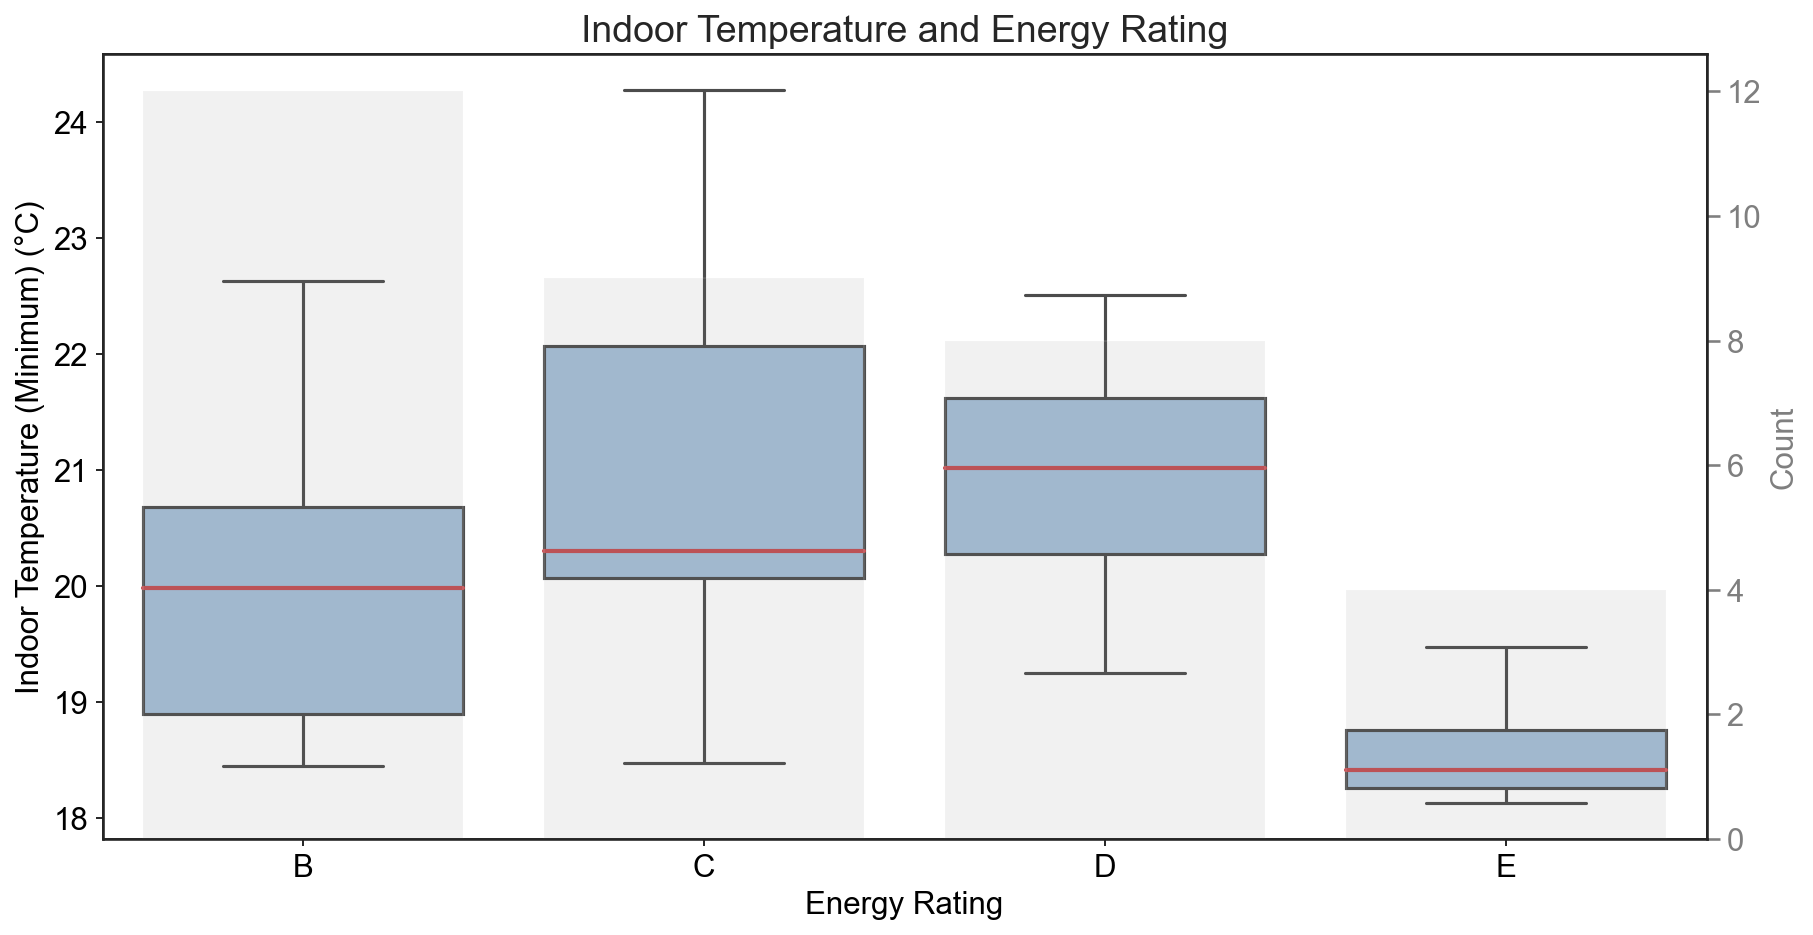

In [24]:
# Difference plot between communal heating
# box plot
var='indoor_min'

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 6),dpi=150)

sns.set_theme(style='white')

ax2 = ax.twinx()

sns.boxplot(data=tempdiff_join, x='energy_rating',y=var, order=['B','C','D','E'], boxprops={"facecolor": (.3, .5, .7, .5)},
    medianprops={"color": "r", "linewidth": 2},ax=ax)

sns.countplot(data=tempdiff_join,x='energy_rating',order=['B','C','D','E'], color='tab:grey',ax=ax2,alpha=0.1)

fig.tight_layout()

plt.title('{} and Energy Rating'.format('Indoor Temperature'),fontsize=18)
ax.set_xlabel('Energy Rating',fontsize=15)
ax.set_ylabel('{} (°C)'.format('Indoor Temperature (Minimum)'),fontsize=15)
ax.tick_params(axis='y',labelsize=15)
ax.tick_params(axis='x',labelsize=15)

ax2.set_ylabel('Count',fontsize=15,color='tab:grey')
ax2.tick_params(axis='y',labelsize=15,labelcolor='tab:grey',color='tab:grey')
# ax2.set_xticklabels(labels=['Yes - summer on','No','Yes - summer off'])

plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)

## Summary statistics

In [146]:
print('mean: {}'.format(tempdiff_join['mean'].mean()))
print('day_mean: {}'.format(tempdiff_join['day_mean'].mean()))
print('night_mean: {}'.format(tempdiff_join['night_mean'].mean()))
print('heatwave_mean: {}'.format(tempdiff_join['heatwave_mean'].mean()))
print('hday_mean: {}'.format(tempdiff_join['hday_mean'].mean()))
print('hnight_mean: {}'.format(tempdiff_join['hnight_mean'].mean()))

print('max: {}'.format(tempdiff_join['max'].max()))
print('day_max: {}'.format(tempdiff_join['day_max'].max()))
print('night_max: {}'.format(tempdiff_join['night_max'].max()))
print('heatwave_max: {}'.format(tempdiff_join['heatwave_max'].max()))
print('hday_max: {}'.format(tempdiff_join['hday_max'].max()))
print('hnight_max: {}'.format(tempdiff_join['hnight_max'].max()))

mean: 4.669482086308713
day_mean: 3.293697147335389
night_mean: 6.641799318324457
heatwave_mean: 4.17992476420803
hday_mean: 3.2458593691964164
hnight_mean: 5.511964176574493
max: 7.441551724137932
day_max: 5.562371134020617
night_max: 9.80883116883117
heatwave_max: 5.1199397590361455
hday_max: 4.747040816326532
hnight_max: 8.066764705882354


## Plot - temp diff (overall hourly)

In [80]:
# %matplotlib inline

# def plot_tempdiff_1(ID):
#     # Plot difference between station and sensor data
#     fig, ax1 = plt.subplots(figsize=(12, 6),dpi=150)

#     # lineplot
#     ax1.plot(compare_data_hour[ID]['Indoor_Mean'], label='Indoor Temperature', linestyle='-', color='tab:red')
#     ax1.plot(compare_data_hour[ID]['Outdoor_Mean'], label='Outdoor Temperature', linestyle='-', color='tab:blue')

#     ax1.fill_between(compare_data_hour[ID]['hourly_time'], compare_data_hour[ID]['Indoor_Mean'], compare_data_hour[ID]['Outdoor_Mean'], color='tab:grey',alpha=.1, linewidth=0)

#     # barplot
#     ax1.bar(compare_data_hour[ID]['hourly_time'], compare_data_hour[ID]['mean_diff'], width=0.05, color='tab:grey', edgecolor="white", linewidth=0.1, label='Temperature difference')

#     # show legend amd title
#     lines, labels = ax1.get_legend_handles_labels()
#     plt.legend(lines, labels, loc='upper left')
#     plt.title('Temperature Difference between Indoor and Outdoor from Sensor {} (EPC:{})'.format(ID,sensor_id.loc[ID,'energy_rating']),
#                   fontsize=15)

#     # set x and y label
#     plt.xlabel('Date',fontsize=12)  # Change the X-axis label to 'Date'
#     plt.ylabel('Temperature (°C)',fontsize=12)

#     ax1.xaxis.set_major_locator(mdates.RRuleLocator(mdates.rrulewrapper(mdates.DAILY, interval=2)))
#     plt.xticks(rotation=45,ha='right')

#     # save the figure
#     plt.tight_layout()
#     plt.savefig('Figure_temp_diff/{}.png'.format(ID))

# for id in sensor_id.index:
#     if id == 'BL007-100':
#         continue
#     plot_tempdiff_1(id)

In [81]:
# %matplotlib inline

# def plot_tempdiff_2(ID):
#     # Plot difference between station and sensor data
#     fig, ax1 = plt.subplots(figsize=(12, 6),dpi=150)
#     sns.set_style('whitegrid')

#     # barplot
#     ax1.bar(compare_data_hour[ID]['hourly_time'], compare_data_hour[ID]['mean_diff'], 
#             width=0.05, edgecolor="white", linewidth=0.1, label='Temperature difference',
#             color=(compare_data_hour[ID]['mean_diff'] > 0).map({True: 'tab:red',
#                                                         False: 'tab:blue'}))

#     # set axis and labels
#     ax1.xaxis.set_major_locator(mdates.RRuleLocator(mdates.rrulewrapper(mdates.DAILY, interval=2)))
#     plt.xticks(rotation=45, ha='right')
#     plt.xlabel('Date',fontsize=12)
#     plt.ylabel('Temperature difference (°C) (Indoor - Outdoor)',fontsize=12)
#     plt.title('Temperature Difference between Indoor and Outdoor from Sensor {} (EPC:{})'.format(ID,sensor_id.loc[ID,'energy_rating']),
#               fontsize=15)

#     plt.tight_layout()
#     plt.savefig('Figure_temp_diff/{}_new.png'.format(ID))

# for id in sensor_id.index:
#     if id == 'BL007-100':
#         continue
#     plot_tempdiff_2(id)

## Plot - interactive

In [82]:
# # Interactive plot
# fig = px.line(compare_data_hour['BL007-19'], x=compare_data_hour['BL007-19'].index, y=compare_data_hour['BL007-19'].columns[[1,4]], labels={
#                      "index": "Time",
#                      "value": "Temperature (°C)",
#                      "variable": ""
#                  },
#                 title="Temperature difference between indoor and outdoor (BL007-19: Band E)",
#                 color_discrete_sequence=['red', "blue"])

# # Show plot 
# fig.update_layout(xaxis_rangeslider_visible=True)
# fig.update_traces(line_width=1)

# fig.show()
# fig.write_html("temp_diff_1_BL007-19.html")

In [83]:
# # Plot the difference value
# # Interactive plot
# fig = px.line(compare_data_hour['BL007-19'], x=compare_data_hour['BL007-19'].index, y=compare_data_hour['BL007-19']['mean_diff'], labels={
#                      "index": "Time",
#                      "value": "Temperature (°C)",
#                      "variable": ""
#                  },
#                 title="Temperature difference between indoor and outdoor (BL007-19: Band E)",
#                 color_discrete_sequence=['red'])

# # Show plot 
# fig.update_layout(xaxis_rangeslider_visible=True)
# fig.update_traces(line_width=1)

# fig.show()
# fig.write_html("temp_diff_2_BL007-19.html")

## Commonalities among households

In [84]:
# Read EPC data (30 households with epc)
epc_data = pd.read_csv('EPC_certificates/epc_concat.csv')

In [85]:
# tempdiff_join
commonality_df = epc_data.join(tempdiff_join,on='Sensor_ID')

In [86]:
tempdiff_join.head()

,indoor_mean,indoor_max,indoor_min,mean,var_household,heatwave_mean,day_mean,night_mean,hday_mean,hnight_mean,max,heatwave_max,day_max,night_max,hday_max,hnight_max,start_date,start_time,end_date,end_time,longitude,latitude,house_type,energy_rating,start_datetime,end_datetime,communal_heating,breeze
BL007-02,24.415756,30.197667,20.586833,4.762674,4.075541,4.334480,3.343364,6.847643,2.935411,6.380879,4.583614,4.265333,3.153358,6.684663,2.927449,6.222239,2023-08-04,18:01:11,2023-09-13,15:49:06,-0.09012,51.49352,Terraced house,D,2023-08-04 18:01:11,2023-09-13 15:49:06,NaN,NaN
BL007-04,25.563244,28.832167,20.863000,6.064357,1.603682,4.636574,4.249319,8.604666,3.090394,6.770740,5.782348,4.587456,3.882884,8.440820,3.142041,6.582535,2023-07-28,19:42:00,2023-09-15,15:07:00,-0.07452,51.47990,"Flat/apartment (high-rise on a low floor, or l...",B,2023-07-28 19:42:00,2023-09-15 15:07:00,"Yes, I'm on communal heating and yes it stays ...",No
BL007-07,23.537122,28.270333,20.068500,4.223765,3.084647,3.845956,2.837107,6.229084,2.992085,5.076534,4.157149,3.970301,2.738599,6.208590,3.182755,5.105294,2023-08-04,19:27:00,2023-09-14,23:00:00,-0.07333,51.47997,Terraced house,C,2023-08-04 19:27:00,2023-09-14 23:00:00,"No, I don't have communal heating",Yes
BL007-09,25.730276,30.363000,22.074833,5.856633,2.875995,4.977288,4.156549,8.355713,3.099980,7.682821,5.564408,4.833012,3.766181,8.207755,2.968776,7.519706,2023-08-04,17:18:00,2023-09-13,19:30:00,-0.08680,51.47774,Duplex Terraced maisonette on top of a ro,C,2023-08-04 17:18:00,2023-09-13 19:30:00,NaN,NaN
BL007-13,25.061454,28.741667,19.417500,5.547907,1.924454,4.362318,3.976751,7.843938,3.048866,6.255233,5.334589,4.330904,3.705008,7.716000,3.121633,6.073676,2023-08-04,17:36:00,2023-09-19,15:23:00,-0.08988,51.47947,"Flat/apartment (high-rise on a low floor, or l...",B,2023-08-04 17:36:00,2023-09-19 15:23:00,"Yes, I'm on communal heating and yes it stays ...",No


In [87]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [88]:
epc_data.dtypes

Sensor_ID                         object
LMK_KEY                           object
ADDRESS1                          object
ADDRESS2                          object
ADDRESS3                          object
POSTCODE                          object
BUILDING_REFERENCE_NUMBER          int64
CURRENT_ENERGY_RATING             object
POTENTIAL_ENERGY_RATING           object
CURRENT_ENERGY_EFFICIENCY          int64
POTENTIAL_ENERGY_EFFICIENCY        int64
PROPERTY_TYPE                     object
BUILT_FORM                        object
INSPECTION_DATE                   object
LOCAL_AUTHORITY                   object
CONSTITUENCY                      object
COUNTY                            object
LODGEMENT_DATE                    object
TRANSACTION_TYPE                  object
ENVIRONMENT_IMPACT_CURRENT         int64
ENVIRONMENT_IMPACT_POTENTIAL       int64
ENERGY_CONSUMPTION_CURRENT         int64
ENERGY_CONSUMPTION_POTENTIAL       int64
CO2_EMISSIONS_CURRENT            float64
CO2_EMISS_CURR_P

### Mean temperature

In [89]:
smallest_df = commonality_df.nsmallest(7, 'indoor_mean')

In [48]:
largest_df = commonality_df.nlargest(7, 'indoor_mean')

In [100]:
common_var_cat = ['CURRENT_ENERGY_RATING','PROPERTY_TYPE', 'BUILT_FORM','FLOOR_LEVEL',
       'FLAT_TOP_STOREY', 'GLAZED_TYPE', 'GLAZED_AREA','WINDOWS_DESCRIPTION','WALLS_DESCRIPTION',
       'FLOOR_DESCRIPTION','ROOF_DESCRIPTION','MECHANICAL_VENTILATION','CONSTRUCTION_AGE_BAND']
common_var_num = ['TOTAL_FLOOR_AREA','FLAT_STOREY_COUNT','MULTI_GLAZE_PROPORTION','FLOOR_HEIGHT']

In [50]:
smallest_df[common_var_num].describe()

,TOTAL_FLOOR_AREA,FLAT_STOREY_COUNT,MULTI_GLAZE_PROPORTION,FLOOR_HEIGHT
count,7.000000,1.0,4.0,2.000000
mean,76.757143,5.0,100.0,2.615000
std,33.015848,NaN,0.0,0.007071
min,44.000000,5.0,100.0,2.610000
25%,62.150000,5.0,100.0,2.612500
50%,68.000000,5.0,100.0,2.615000
75%,77.000000,5.0,100.0,2.617500
max,147.000000,5.0,100.0,2.620000


In [51]:
largest_df[common_var_num].describe()

,TOTAL_FLOOR_AREA,FLAT_STOREY_COUNT,MULTI_GLAZE_PROPORTION,FLOOR_HEIGHT
count,7.000000,2.000000,5.0,5.000000
mean,69.095714,3.500000,100.0,2.364000
std,13.591993,0.707107,0.0,0.140107
min,48.630000,3.000000,100.0,2.200000
25%,62.460000,3.250000,100.0,2.300000
50%,72.000000,3.500000,100.0,2.350000
75%,75.060000,3.750000,100.0,2.390000
max,88.000000,4.000000,100.0,2.580000


In [52]:
for var in common_var_cat:
    print(largest_df[var].value_counts())

B    3
C    3
D    1
Name: CURRENT_ENERGY_RATING, dtype: int64
Flat          5
Maisonette    1
House         1
Name: PROPERTY_TYPE, dtype: int64
Mid-Terrace    4
Detached       2
NO DATA!       1
Name: BUILT_FORM, dtype: int64
2nd             2
4               1
ground floor    1
mid floor       1
3rd             1
Name: FLOOR_LEVEL, dtype: int64
N    2
Y    2
Name: FLAT_TOP_STOREY, dtype: int64
double glazing, unknown install date             3
double glazing installed during or after 2002    2
NO DATA!                                         2
Name: GLAZED_TYPE, dtype: int64
Normal      5
NO DATA!    2
Name: GLAZED_AREA, dtype: int64
Fully double glazed         5
High performance glazing    2
Name: WINDOWS_DESCRIPTION, dtype: int64
Cavity wall, filled cavity                        2
Average thermal transmittance 0.20 W/m-??K        1
Cavity wall, as built, insulated (assumed)        1
Cavity wall, as built, no insulation (assumed)    1
Average thermal transmittance 0.15 W/m-??K      

In [53]:
for var in common_var_cat:
    print(smallest_df[var].value_counts())

B    4
C    3
Name: CURRENT_ENERGY_RATING, dtype: int64
Flat     6
House    1
Name: PROPERTY_TYPE, dtype: int64
Mid-Terrace             3
Enclosed End-Terrace    2
NO DATA!                1
End-Terrace             1
Name: BUILT_FORM, dtype: int64
mid floor    3
1st          2
4th          1
Name: FLOOR_LEVEL, dtype: int64
N    3
Name: FLAT_TOP_STOREY, dtype: int64
double glazing installed during or after 2002    3
NO DATA!                                         3
double glazing installed before 2002             1
Name: GLAZED_TYPE, dtype: int64
Normal               3
NO DATA!             3
More Than Typical    1
Name: GLAZED_AREA, dtype: int64
Fully double glazed         4
High performance glazing    3
Name: WINDOWS_DESCRIPTION, dtype: int64
Solid brick, as built, no insulation (assumed)     2
Average thermal transmittance 0.2 W/m-??K          2
System built, as built, insulated (assumed)        1
Average thermal transmittance 0.31 W/m-??K         1
System built, as built, no insulati

In [54]:
largest_df

,Sensor_ID,LMK_KEY,ADDRESS1,ADDRESS2,ADDRESS3,POSTCODE,BUILDING_REFERENCE_NUMBER,CURRENT_ENERGY_RATING,POTENTIAL_ENERGY_RATING,CURRENT_ENERGY_EFFICIENCY,POTENTIAL_ENERGY_EFFICIENCY,PROPERTY_TYPE,BUILT_FORM,INSPECTION_DATE,LOCAL_AUTHORITY,CONSTITUENCY,COUNTY,LODGEMENT_DATE,TRANSACTION_TYPE,ENVIRONMENT_IMPACT_CURRENT,ENVIRONMENT_IMPACT_POTENTIAL,ENERGY_CONSUMPTION_CURRENT,ENERGY_CONSUMPTION_POTENTIAL,CO2_EMISSIONS_CURRENT,CO2_EMISS_CURR_PER_FLOOR_AREA,CO2_EMISSIONS_POTENTIAL,LIGHTING_COST_CURRENT,LIGHTING_COST_POTENTIAL,HEATING_COST_CURRENT,HEATING_COST_POTENTIAL,HOT_WATER_COST_CURRENT,HOT_WATER_COST_POTENTIAL,TOTAL_FLOOR_AREA,ENERGY_TARIFF,MAINS_GAS_FLAG,FLOOR_LEVEL,FLAT_TOP_STOREY,FLAT_STOREY_COUNT,MAIN_HEATING_CONTROLS,MULTI_GLAZE_PROPORTION,GLAZED_TYPE,GLAZED_AREA,EXTENSION_COUNT,NUMBER_HABITABLE_ROOMS,NUMBER_HEATED_ROOMS,LOW_ENERGY_LIGHTING,NUMBER_OPEN_FIREPLACES,HOTWATER_DESCRIPTION,HOT_WATER_ENERGY_EFF,HOT_WATER_ENV_EFF,FLOOR_DESCRIPTION,FLOOR_ENERGY_EFF,FLOOR_ENV_EFF,WINDOWS_DESCRIPTION,WINDOWS_ENERGY_EFF,WINDOWS_ENV_EFF,WALLS_DESCRIPTION,WALLS_ENERGY_EFF,WALLS_ENV_EFF,SECONDHEAT_DESCRIPTION,SHEATING_ENERGY_EFF,SHEATING_ENV_EFF,ROOF_DESCRIPTION,ROOF_ENERGY_EFF,ROOF_ENV_EFF,MAINHEAT_DESCRIPTION,MAINHEAT_ENERGY_EFF,MAINHEAT_ENV_EFF,MAINHEATCONT_DESCRIPTION,MAINHEATC_ENERGY_EFF,MAINHEATC_ENV_EFF,LIGHTING_DESCRIPTION,LIGHTING_ENERGY_EFF,LIGHTING_ENV_EFF,MAIN_FUEL,WIND_TURBINE_COUNT,HEAT_LOSS_CORRIDOR,UNHEATED_CORRIDOR_LENGTH,FLOOR_HEIGHT,PHOTO_SUPPLY,SOLAR_WATER_HEATING_FLAG,MECHANICAL_VENTILATION,ADDRESS,LOCAL_AUTHORITY_LABEL,CONSTITUENCY_LABEL,POSTTOWN,CONSTRUCTION_AGE_BAND,LODGEMENT_DATETIME,TENURE,FIXED_LIGHTING_OUTLETS_COUNT,LOW_ENERGY_FIXED_LIGHT_COUNT,UPRN,UPRN_SOURCE,indoor_mean,mean,var_household,heatwave_mean,day_mean,night_mean,hday_mean,hnight_mean,max,heatwave_max,day_max,night_max,hday_max,hnight_max,start_date,start_time,end_date,end_time,longitude,latitude,house_type,energy_rating,start_datetime,end_datetime,communal_heating,breeze
18,BL007-36,991f90bc0427748a6ee611b03230719a518db9b79ad1e3...,271 Sumner Road,NaN,NaN,SE15 5QL,10002387366,C,B,73,91,House,Mid-Terrace,16/05/2022,E09000028,E14000615,NaN,12/10/2022,rental,71,91,169,31,2.1,30,0.4,67,67,304,251,134,65,72.00,Single,Y,NaN,NaN,NaN,NaN,100.0,"double glazing, unknown install date",Normal,0.0,3.0,3.0,100.0,0.0,From main system,Good,Good,"Solid, limited insulation (assumed)",NaN,NaN,Fully double glazed,Average,Average,"Cavity wall, filled cavity",Good,Good,None,NaN,NaN,"Pitched, 50 mm loft insulation",Poor,Poor,"Boiler and radiators, mains gas",Good,Good,"Programmer, room thermostat and TRVs",Good,Good,Low energy lighting in all fixed outlets,Very Good,Very Good,mains gas (not community),0.0,NaN,NaN,2.20,0.0,N,natural,271 Sumner Road,Southwark,Camberwell and Peckham,LONDON,England and Wales: 1996-2002,12/10/2022 12:29,Rented (social),8.0,NaN,2.000000e+11,Energy Assessor,27.095870,7.091803,1.651522,5.262481,5.136747,9.922896,3.196511,8.239909,6.764520,5.119940,4.688868,9.770246,3.075204,8.066765,2023-08-04,19:59:00,2023-09-13,18:50:00,-0.07197,51.47489,Terraced house,C,2023-08-04 19:59:00,2023-09-13 18:50:00,NaN,NaN
13,BL007-28,5.82E+32,"35, Bath Close",NaN,NaN,SE15 2JP,5139892868,C,C,77,79,Flat,Mid-Terrace,18/01/2011,E09000028,E14000615,Greater London Authority,18/01/2011,rental (social),72,73,242,233,2.0,40,1.9,55,27,282,287,106,106,48.63,Single,Y,2nd,Y,3.0,2305.0,100.0,"double glazing, unknown install date",Normal,0.0,2.0,2.0,0.0,0.0,From main system,Good,Good,(other premises below),NaN,NaN,Fully double glazed,Average,Average,"Cavity wall, filled cavity",Good,Good,None,NaN,NaN,"Pitched, limited insulation (assumed)",Poor,Poor,Community scheme,Good,Good,"Flat rate charging, programmer and TRVs",Average,Average,No low energy lighting,Very Poor,Very Poor,mains gas - this is for backwards compatibilit...,0.0,unheated corridor,4.26,2.39,0.0,N,natural,"35, Bath Close",Southwark,Camberwell and Peckham,LONDON,England and Wales: 1976-1982,18/01/2011 21:45,rental (

In [55]:
smallest_df

,Sensor_ID,LMK_KEY,ADDRESS1,ADDRESS2,ADDRESS3,POSTCODE,BUILDING_REFERENCE_NUMBER,CURRENT_ENERGY_RATING,POTENTIAL_ENERGY_RATING,CURRENT_ENERGY_EFFICIENCY,POTENTIAL_ENERGY_EFFICIENCY,PROPERTY_TYPE,BUILT_FORM,INSPECTION_DATE,LOCAL_AUTHORITY,CONSTITUENCY,COUNTY,LODGEMENT_DATE,TRANSACTION_TYPE,ENVIRONMENT_IMPACT_CURRENT,ENVIRONMENT_IMPACT_POTENTIAL,ENERGY_CONSUMPTION_CURRENT,ENERGY_CONSUMPTION_POTENTIAL,CO2_EMISSIONS_CURRENT,CO2_EMISS_CURR_PER_FLOOR_AREA,CO2_EMISSIONS_POTENTIAL,LIGHTING_COST_CURRENT,LIGHTING_COST_POTENTIAL,HEATING_COST_CURRENT,HEATING_COST_POTENTIAL,HOT_WATER_COST_CURRENT,HOT_WATER_COST_POTENTIAL,TOTAL_FLOOR_AREA,ENERGY_TARIFF,MAINS_GAS_FLAG,FLOOR_LEVEL,FLAT_TOP_STOREY,FLAT_STOREY_COUNT,MAIN_HEATING_CONTROLS,MULTI_GLAZE_PROPORTION,GLAZED_TYPE,GLAZED_AREA,EXTENSION_COUNT,NUMBER_HABITABLE_ROOMS,NUMBER_HEATED_ROOMS,LOW_ENERGY_LIGHTING,NUMBER_OPEN_FIREPLACES,HOTWATER_DESCRIPTION,HOT_WATER_ENERGY_EFF,HOT_WATER_ENV_EFF,FLOOR_DESCRIPTION,FLOOR_ENERGY_EFF,FLOOR_ENV_EFF,WINDOWS_DESCRIPTION,WINDOWS_ENERGY_EFF,WINDOWS_ENV_EFF,WALLS_DESCRIPTION,WALLS_ENERGY_EFF,WALLS_ENV_EFF,SECONDHEAT_DESCRIPTION,SHEATING_ENERGY_EFF,SHEATING_ENV_EFF,ROOF_DESCRIPTION,ROOF_ENERGY_EFF,ROOF_ENV_EFF,MAINHEAT_DESCRIPTION,MAINHEAT_ENERGY_EFF,MAINHEAT_ENV_EFF,MAINHEATCONT_DESCRIPTION,MAINHEATC_ENERGY_EFF,MAINHEATC_ENV_EFF,LIGHTING_DESCRIPTION,LIGHTING_ENERGY_EFF,LIGHTING_ENV_EFF,MAIN_FUEL,WIND_TURBINE_COUNT,HEAT_LOSS_CORRIDOR,UNHEATED_CORRIDOR_LENGTH,FLOOR_HEIGHT,PHOTO_SUPPLY,SOLAR_WATER_HEATING_FLAG,MECHANICAL_VENTILATION,ADDRESS,LOCAL_AUTHORITY_LABEL,CONSTITUENCY_LABEL,POSTTOWN,CONSTRUCTION_AGE_BAND,LODGEMENT_DATETIME,TENURE,FIXED_LIGHTING_OUTLETS_COUNT,LOW_ENERGY_FIXED_LIGHT_COUNT,UPRN,UPRN_SOURCE,indoor_mean,mean,var_household,heatwave_mean,day_mean,night_mean,hday_mean,hnight_mean,max,heatwave_max,day_max,night_max,hday_max,hnight_max,start_date,start_time,end_date,end_time,longitude,latitude,house_type,energy_rating,start_datetime,end_datetime,communal_heating,breeze
14,BL007-32,2.91E+32,Flat 43 St. Peters House,Queens Row,NaN,SE17 2PU,4462042668,B,B,82,84,Flat,Mid-Terrace,26/05/2009,E09000028,E14000615,Greater London Authority,26/05/2009,rental (social),81,82,153,143,1.5,25,1.4,56,28,207,211,80,80,58.3,Single,Y,1st,N,5.0,2104.0,100.0,double glazing installed before 2002,Normal,0.0,3.0,3.0,0.0,0.0,From main system,Good,Good,(other premises below),NaN,NaN,Fully double glazed,Average,Average,"Solid brick, as built, no insulation (assumed)",Very Poor,Very Poor,"Room heaters, mains gas",NaN,NaN,(another dwelling above),NaN,NaN,"Boiler and radiators, mains gas",Good,Good,Programmer and room thermostat,Poor,Poor,No low energy lighting,Very Poor,Very Poor,mains gas - this is for backwards compatibilit...,0.0,unheated corridor,3.81,2.61,0.0,N,natural,"Flat 43 St. Peters House, Queens Row",Southwark,Camberwell and Peckham,LONDON,England and Wales: 1950-1966,26/05/2009 20:50,rental (social),NaN,NaN,2.000000e+11,Address Matched,21.729336,3.408070,1.838766,3.716845,2.685379,4.460468,4.199087,3.021848,3.427683,3.921807,2.824066,4.306682,4.649184,2.873529,2023-08-01,08:23:00,2023-09-16,12:55:00,-0.09175,51.48479,"Flat/apartment (high-rise, on a mid to high fl...",B,2023-08-01 08:23:00,2023-09-16 12:55:00,NaN,NaN
31,BL007-67,1e3f11a4a4e3a935cad52a40154a76f18259232e6d18c0...,50 Rainbow Street,NaN,NaN,SE5 7TD,10002320896,C,B,72,82,House,Mid-Terrace,11/02/2022,E09000028,E14000615,NaN,15/02/2022,marketed sale,67,78,151,91,3.9,27,2.4,109,109,634,539,85,85,147.0,Unknown,Y,NaN,NaN,NaN,NaN,100.0,double glazing installed during or after 2002,Normal,4.0,6.0,6.0,91.0,0.0,From main system,Good,Good,"Suspended, no insulation (assumed)",NaN,NaN,Fully double glazed,Good,Good,"Solid brick, as built, no insulation (assumed)",Very Poor,Very Poor,None,NaN,NaN,"Pitched, no insulation (assumed)",Very Poor,Very Poor,"Boiler and radiators, mains gas",Good,Good,"Programmer, room thermostat and TRVs",Good,Good,Low energy lighting in 91% of fixed outlets,Very Good,Very Good,mains gas 

In [54]:
# Cluster analysis
largest_clus_df = pd.read_csv('largest.csv',index_col=0)

In [56]:
smallest_clus_df = pd.read_csv('smallest.csv',index_col=0)

In [72]:
smallest_clus_df

,BUILT_FORM,CONSTRUCTION_AGE_BAND,WALLS_DESCRIPTION
14,Mid-Terrace,1950-1999,Solid brick
31,Mid-Terrace,before 1900,Solid brick
19,Mid-Terrace,1950-1999,System built
28,NaN,NaN,0.31
6,Enclosed End-Terrace,NaN,0.2
5,End-Terrace,2000 onwards,System built
16,Enclosed End-Terrace,NaN,0.2


In [63]:
largest_encoded = pd.get_dummies(largest_clus_df, columns=['BUILT_FORM', 'CONSTRUCTION_AGE_BAND','WALLS_DESCRIPTION'])
largest_encoded.dtypes

kmeans = KMeans(n_clusters=3, random_state=0).fit(largest_encoded)
print(kmeans.labels_)
print(kmeans.cluster_centers_)

In [74]:
smallest_encoded.dtypes

BUILT_FORM_Enclosed End-Terrace       uint8
BUILT_FORM_End-Terrace                uint8
BUILT_FORM_Mid-Terrace                uint8
CONSTRUCTION_AGE_BAND_1950-1999       uint8
CONSTRUCTION_AGE_BAND_2000 onwards    uint8
CONSTRUCTION_AGE_BAND_before 1900     uint8
WALLS_DESCRIPTION_0.2                 uint8
WALLS_DESCRIPTION_0.31                uint8
WALLS_DESCRIPTION_Solid brick         uint8
WALLS_DESCRIPTION_System built        uint8
dtype: object

In [73]:
smallest_encoded = pd.get_dummies(smallest_clus_df, columns=['BUILT_FORM', 'CONSTRUCTION_AGE_BAND','WALLS_DESCRIPTION'])
smallest_encoded.dtypes

kmeans = KMeans(n_clusters=3, random_state=0).fit(smallest_encoded)
print(kmeans.labels_)
print(kmeans.cluster_centers_)

[1 1 1 0 0 2 0]
[[6.66666667e-01 0.00000000e+00 5.55111512e-17 0.00000000e+00
  0.00000000e+00 0.00000000e+00 6.66666667e-01 3.33333333e-01
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 6.66666667e-01
  0.00000000e+00 3.33333333e-01 0.00000000e+00 0.00000000e+00
  6.66666667e-01 3.33333333e-01]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00
  1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.00000000e+00]]


### Max temperature

In [90]:
largest_max_df = commonality_df.nlargest(7, 'indoor_max')

In [96]:
largest_max_df

,Sensor_ID,LMK_KEY,ADDRESS1,ADDRESS2,ADDRESS3,POSTCODE,BUILDING_REFERENCE_NUMBER,CURRENT_ENERGY_RATING,POTENTIAL_ENERGY_RATING,CURRENT_ENERGY_EFFICIENCY,POTENTIAL_ENERGY_EFFICIENCY,PROPERTY_TYPE,BUILT_FORM,INSPECTION_DATE,LOCAL_AUTHORITY,CONSTITUENCY,COUNTY,LODGEMENT_DATE,TRANSACTION_TYPE,ENVIRONMENT_IMPACT_CURRENT,ENVIRONMENT_IMPACT_POTENTIAL,ENERGY_CONSUMPTION_CURRENT,ENERGY_CONSUMPTION_POTENTIAL,CO2_EMISSIONS_CURRENT,CO2_EMISS_CURR_PER_FLOOR_AREA,CO2_EMISSIONS_POTENTIAL,LIGHTING_COST_CURRENT,LIGHTING_COST_POTENTIAL,HEATING_COST_CURRENT,HEATING_COST_POTENTIAL,HOT_WATER_COST_CURRENT,HOT_WATER_COST_POTENTIAL,TOTAL_FLOOR_AREA,ENERGY_TARIFF,MAINS_GAS_FLAG,FLOOR_LEVEL,FLAT_TOP_STOREY,FLAT_STOREY_COUNT,MAIN_HEATING_CONTROLS,MULTI_GLAZE_PROPORTION,GLAZED_TYPE,GLAZED_AREA,EXTENSION_COUNT,NUMBER_HABITABLE_ROOMS,NUMBER_HEATED_ROOMS,LOW_ENERGY_LIGHTING,NUMBER_OPEN_FIREPLACES,HOTWATER_DESCRIPTION,HOT_WATER_ENERGY_EFF,HOT_WATER_ENV_EFF,FLOOR_DESCRIPTION,FLOOR_ENERGY_EFF,FLOOR_ENV_EFF,WINDOWS_DESCRIPTION,WINDOWS_ENERGY_EFF,WINDOWS_ENV_EFF,WALLS_DESCRIPTION,WALLS_ENERGY_EFF,WALLS_ENV_EFF,SECONDHEAT_DESCRIPTION,SHEATING_ENERGY_EFF,SHEATING_ENV_EFF,ROOF_DESCRIPTION,ROOF_ENERGY_EFF,ROOF_ENV_EFF,MAINHEAT_DESCRIPTION,MAINHEAT_ENERGY_EFF,MAINHEAT_ENV_EFF,MAINHEATCONT_DESCRIPTION,MAINHEATC_ENERGY_EFF,MAINHEATC_ENV_EFF,LIGHTING_DESCRIPTION,LIGHTING_ENERGY_EFF,LIGHTING_ENV_EFF,MAIN_FUEL,WIND_TURBINE_COUNT,HEAT_LOSS_CORRIDOR,UNHEATED_CORRIDOR_LENGTH,FLOOR_HEIGHT,PHOTO_SUPPLY,SOLAR_WATER_HEATING_FLAG,MECHANICAL_VENTILATION,ADDRESS,LOCAL_AUTHORITY_LABEL,CONSTITUENCY_LABEL,POSTTOWN,CONSTRUCTION_AGE_BAND,LODGEMENT_DATETIME,TENURE,FIXED_LIGHTING_OUTLETS_COUNT,LOW_ENERGY_FIXED_LIGHT_COUNT,UPRN,UPRN_SOURCE,indoor_mean,indoor_max,indoor_min,mean,var_household,heatwave_mean,day_mean,night_mean,hday_mean,hnight_mean,max,heatwave_max,day_max,night_max,hday_max,hnight_max,start_date,start_time,end_date,end_time,longitude,latitude,house_type,energy_rating,start_datetime,end_datetime,communal_heating,breeze
7,BL007-17,1.16E+33,Flat 10 Primrose House,Peckham Hill Street,NaN,SE15 5SS,6028264278,E,E,47,52,Maisonette,Mid-Terrace,18/06/2014,E09000028,E14000615,Greater London Authority,20/06/2014,marketed sale,41,45,382,347,5.0,74,4.5,44,44,877,794,129,129,67.00,Single,Y,3rd,Y,NaN,2301.0,100.0,double glazing installed before 2002,Normal,0.0,3.0,3.0,100.0,0.0,Community scheme,Good,Good,(other premises below),NaN,NaN,Fully double glazed,Average,Average,"Solid brick, as built, no insulation (assumed)",Very Poor,Very Poor,None,NaN,NaN,"Roof room(s), no insulation (assumed)",Very Poor,Very Poor,Community scheme,Good,Good,"Flat rate charging, no thermostatic control",Very Poor,Very Poor,Low energy lighting in all fixed outlets,Very Good,Very Good,mains gas (community),0.0,no corridor,NaN,NaN,0.0,NaN,natural,"Flat 10 Primrose House, Peckham Hill Street",Southwark,Camberwell and Peckham,LONDON,England and Wales: 1900-1929,20/06/2014 10:46,owner-occupied,7.0,7.0,2.000000e+11,Address Matched,23.814472,31.491333,18.308833,4.398689,6.243208,4.967571,2.777125,6.688480,3.004051,7.363730,4.279533,4.882061,2.677840,6.541264,2.965000,7.221525,2023-08-05,14:21:00,2023-09-13,07:55:48,-0.06868,51.47473,"Flat/apartment (high-rise, on a mid to high fl...",E,2023-08-05 14:21:00,2023-09-13 07:55:48,"Yes, I'm on communal heating but it turns off ...",No
9,BL007-19,4.70E+32,"19, Aylesbury Road",NaN,NaN,SE17 2EQ,3467194768,E,D,54,68,Flat,Mid-Terrace,23/07/2020,E09000028,E14000615,Greater London Authority,23/07/2020,marketed sale,43,60,292,191,4.3,61,2.8,120,61,656,442,91,91,71.00,Single,Y,1st,Y,NaN,2104.0,0.0,not defined,Normal,1.0,4.0,4.0,0.0,2.0,From main system,Good,Good,(another dwelling below),NO DATA!,NaN,Single glazed,Very Poor,Very Poor,"Solid brick, as built, no insulation (assumed)",Very Poor,Very Poor,"Room heaters, smokeless fuel",NaN,NaN,"Pitched, no insulation (assumed)",Very Poor,Very Poor,"Boiler and radiators, mains gas",Good,Good,Programmer and room thermostat,Average,Average,N

In [97]:
smallest_max_df = commonality_df.nsmallest(7, 'indoor_max')

In [99]:
smallest_max_df

,Sensor_ID,LMK_KEY,ADDRESS1,ADDRESS2,ADDRESS3,POSTCODE,BUILDING_REFERENCE_NUMBER,CURRENT_ENERGY_RATING,POTENTIAL_ENERGY_RATING,CURRENT_ENERGY_EFFICIENCY,POTENTIAL_ENERGY_EFFICIENCY,PROPERTY_TYPE,BUILT_FORM,INSPECTION_DATE,LOCAL_AUTHORITY,CONSTITUENCY,COUNTY,LODGEMENT_DATE,TRANSACTION_TYPE,ENVIRONMENT_IMPACT_CURRENT,ENVIRONMENT_IMPACT_POTENTIAL,ENERGY_CONSUMPTION_CURRENT,ENERGY_CONSUMPTION_POTENTIAL,CO2_EMISSIONS_CURRENT,CO2_EMISS_CURR_PER_FLOOR_AREA,CO2_EMISSIONS_POTENTIAL,LIGHTING_COST_CURRENT,LIGHTING_COST_POTENTIAL,HEATING_COST_CURRENT,HEATING_COST_POTENTIAL,HOT_WATER_COST_CURRENT,HOT_WATER_COST_POTENTIAL,TOTAL_FLOOR_AREA,ENERGY_TARIFF,MAINS_GAS_FLAG,FLOOR_LEVEL,FLAT_TOP_STOREY,FLAT_STOREY_COUNT,MAIN_HEATING_CONTROLS,MULTI_GLAZE_PROPORTION,GLAZED_TYPE,GLAZED_AREA,EXTENSION_COUNT,NUMBER_HABITABLE_ROOMS,NUMBER_HEATED_ROOMS,LOW_ENERGY_LIGHTING,NUMBER_OPEN_FIREPLACES,HOTWATER_DESCRIPTION,HOT_WATER_ENERGY_EFF,HOT_WATER_ENV_EFF,FLOOR_DESCRIPTION,FLOOR_ENERGY_EFF,FLOOR_ENV_EFF,WINDOWS_DESCRIPTION,WINDOWS_ENERGY_EFF,WINDOWS_ENV_EFF,WALLS_DESCRIPTION,WALLS_ENERGY_EFF,WALLS_ENV_EFF,SECONDHEAT_DESCRIPTION,SHEATING_ENERGY_EFF,SHEATING_ENV_EFF,ROOF_DESCRIPTION,ROOF_ENERGY_EFF,ROOF_ENV_EFF,MAINHEAT_DESCRIPTION,MAINHEAT_ENERGY_EFF,MAINHEAT_ENV_EFF,MAINHEATCONT_DESCRIPTION,MAINHEATC_ENERGY_EFF,MAINHEATC_ENV_EFF,LIGHTING_DESCRIPTION,LIGHTING_ENERGY_EFF,LIGHTING_ENV_EFF,MAIN_FUEL,WIND_TURBINE_COUNT,HEAT_LOSS_CORRIDOR,UNHEATED_CORRIDOR_LENGTH,FLOOR_HEIGHT,PHOTO_SUPPLY,SOLAR_WATER_HEATING_FLAG,MECHANICAL_VENTILATION,ADDRESS,LOCAL_AUTHORITY_LABEL,CONSTITUENCY_LABEL,POSTTOWN,CONSTRUCTION_AGE_BAND,LODGEMENT_DATETIME,TENURE,FIXED_LIGHTING_OUTLETS_COUNT,LOW_ENERGY_FIXED_LIGHT_COUNT,UPRN,UPRN_SOURCE,indoor_mean,indoor_max,indoor_min,mean,var_household,heatwave_mean,day_mean,night_mean,hday_mean,hnight_mean,max,heatwave_max,day_max,night_max,hday_max,hnight_max,start_date,start_time,end_date,end_time,longitude,latitude,house_type,energy_rating,start_datetime,end_datetime,communal_heating,breeze
5,BL007-14,9.57E+32,Flat 16 Hitard Court,Boyson Road,NaN,SE17 2FG,7032320178,C,C,78,78,Flat,End-Terrace,15/05/2013,E09000028,E14000615,Greater London Authority,04/07/2013,rental (social),73,73,216,216,1.7,38,1.7,31,31,200,200,125,125,44.0,dual,N,4th,N,NaN,2106.0,100.0,double glazing installed during or after 2002,Normal,0.0,2.0,2.0,100.0,0.0,From main system,Average,Very Poor,(other premises below),NaN,NaN,Fully double glazed,Good,Good,"System built, as built, insulated (assumed)",Good,Good,None,NaN,NaN,(another dwelling above),NaN,NaN,"Boiler and radiators, electric",Poor,Very Poor,"Programmer, room thermostat and TRVs",Good,Good,Low energy lighting in all fixed outlets,Very Good,Very Good,electricity (not community),0.0,no corridor,NaN,NaN,0.0,NaN,natural,"Flat 16 Hitard Court, Boyson Road",Southwark,Camberwell and Peckham,LONDON,England and Wales: 2007 onwards,04/07/2013 02:40,rental (social),7.0,7.0,1.009028e+10,Address Matched,22.858388,24.161667,21.483333,5.274751,0.617271,NaN,2.632286,8.247524,NaN,NaN,5.145882,NaN,2.654444,7.948750,NaN,NaN,2023-08-06,16:23:00,2023-08-08,01:08:14,-0.09326,51.48378,"Flat/apartment (high-rise, on a mid to high fl...",C,2023-08-06 16:23:00,2023-08-08 01:08:14,NaN,NaN
6,BL007-15,1.65E+33,Flat 4 Dunvill Court,"25, Benhill Road",NaN,SE5 7FT,6141729578,B,B,84,84,Flat,Enclosed End-Terrace,19/07/2018,E09000028,E14000615,Greater London Authority,19/07/2018,new dwelling,92,92,42,42,0.6,8,0.6,56,56,180,180,86,86,77.0,standard tariff,NaN,mid floor,NaN,NaN,NaN,NaN,NO DATA!,NO DATA!,NaN,NaN,NaN,100.0,0.0,From main system,Good,Good,Average thermal transmittance 0.2 W/m-??K,Very Good,Very Good,High performance glazing,Very Good,Very Good,Average thermal transmittance 0.2 W/m-??K,Very Good,Very Good,None,NaN,NaN,Average thermal transmittance 0.2 W/m-??K,Good,Good,"Boiler and radiators, mains gas",Good,Good,Time and temperature zone control,Very Good,Very Good,Low energy lighting in all fixed outlets,Very Good,Very Good,mains gas - this is

In [101]:
for var in common_var_cat:
    print(largest_max_df[var].value_counts())

C    2
E    2
D    2
B    1
Name: CURRENT_ENERGY_RATING, dtype: int64
Flat          3
Maisonette    2
House         2
Name: PROPERTY_TYPE, dtype: int64
Mid-Terrace    6
NO DATA!       1
Name: BUILT_FORM, dtype: int64
2nd        2
NODATA!    1
1st        1
4          1
3rd        1
Name: FLOOR_LEVEL, dtype: int64
Y    4
N    1
Name: FLAT_TOP_STOREY, dtype: int64
not defined                                      2
double glazing installed during or after 2002    2
double glazing, unknown install date             2
double glazing installed before 2002             1
Name: GLAZED_TYPE, dtype: int64
Normal    7
Name: GLAZED_AREA, dtype: int64
Fully double glazed    5
Single glazed          2
Name: WINDOWS_DESCRIPTION, dtype: int64
Cavity wall, as built, insulated (assumed)             2
Solid brick, as built, no insulation (assumed)         2
Cavity wall, filled cavity                             1
Cavity wall, as built, no insulation (assumed)         1
Cavity wall, as built, partial insulat

In [102]:
for var in common_var_cat:
    print(smallest_max_df[var].value_counts())

B    4
C    3
Name: CURRENT_ENERGY_RATING, dtype: int64
Flat     6
House    1
Name: PROPERTY_TYPE, dtype: int64
Mid-Terrace             3
Enclosed End-Terrace    2
End-Terrace             1
Detached                1
Name: BUILT_FORM, dtype: int64
1st          2
mid floor    2
top floor    1
4th          1
Name: FLOOR_LEVEL, dtype: int64
N    3
Name: FLAT_TOP_STOREY, dtype: int64
double glazing installed during or after 2002    3
NO DATA!                                         3
double glazing installed before 2002             1
Name: GLAZED_TYPE, dtype: int64
Normal               3
NO DATA!             3
More Than Typical    1
Name: GLAZED_AREA, dtype: int64
Fully double glazed         4
High performance glazing    3
Name: WINDOWS_DESCRIPTION, dtype: int64
Solid brick, as built, no insulation (assumed)     2
Average thermal transmittance 0.2 W/m-??K          2
Average thermal transmittance 0.20 W/m-??K         1
System built, as built, no insulation (assumed)    1
System built, as bui

In [103]:
largest_max_df[common_var_num].describe()

,TOTAL_FLOOR_AREA,FLAT_STOREY_COUNT,MULTI_GLAZE_PROPORTION,FLOOR_HEIGHT
count,7.000000,1.0,7.000000,5.00000
mean,70.874286,4.0,71.428571,2.30600
std,3.664782,NaN,48.795004,0.06269
min,67.000000,4.0,0.000000,2.20000
25%,68.500000,4.0,50.000000,2.30000
50%,71.000000,4.0,100.000000,2.33000
75%,71.500000,4.0,100.000000,2.35000
max,78.120000,4.0,100.000000,2.35000


In [104]:
smallest_max_df[common_var_num].describe()

,TOTAL_FLOOR_AREA,FLAT_STOREY_COUNT,MULTI_GLAZE_PROPORTION,FLOOR_HEIGHT
count,7.000000,1.0,4.0,2.000000
mean,77.614286,5.0,100.0,2.615000
std,32.766977,NaN,0.0,0.007071
min,44.000000,5.0,100.0,2.610000
25%,63.150000,5.0,100.0,2.612500
50%,72.000000,5.0,100.0,2.615000
75%,77.000000,5.0,100.0,2.617500
max,147.000000,5.0,100.0,2.620000


In [107]:
# Cluster analysis
largest_max_df[['CURRENT_ENERGY_RATING','PROPERTY_TYPE','BUILT_FORM',
               'CONSTRUCTION_AGE_BAND','WALLS_DESCRIPTION']].to_csv('largest_max.csv')

In [108]:
smallest_max_df[['CURRENT_ENERGY_RATING','PROPERTY_TYPE','BUILT_FORM',
               'CONSTRUCTION_AGE_BAND','WALLS_DESCRIPTION']].to_csv('smallest_max.csv')

In [118]:
cluster_largest_max = pd.read_csv('largest_max.csv',index_col=0)

In [119]:
largest_encoded = pd.get_dummies(cluster_largest_max, columns=['CURRENT_ENERGY_RATING','PROPERTY_TYPE','BUILT_FORM',
               'CONSTRUCTION_AGE_BAND','WALLS_DESCRIPTION'])
print(largest_encoded.dtypes)

kmeans = KMeans(n_clusters=3, random_state=0).fit(largest_encoded)
print(kmeans.labels_)
print(kmeans.cluster_centers_)

CURRENT_ENERGY_RATING_B               uint8
CURRENT_ENERGY_RATING_C               uint8
CURRENT_ENERGY_RATING_D               uint8
CURRENT_ENERGY_RATING_E               uint8
PROPERTY_TYPE_Flat                    uint8
PROPERTY_TYPE_House                   uint8
PROPERTY_TYPE_Maisonette              uint8
BUILT_FORM_Mid-Terrace                uint8
CONSTRUCTION_AGE_BAND_1900-1949       uint8
CONSTRUCTION_AGE_BAND_1950-1999       uint8
CONSTRUCTION_AGE_BAND_2000 onwards    uint8
WALLS_DESCRIPTION_Cavity wall         uint8
WALLS_DESCRIPTION_Solid brick         uint8
dtype: object
[0 0 1 2 2 2 1]
[[0.         0.         0.         1.         0.5        0.
  0.5        1.         1.         0.         0.         0.
  1.        ]
 [0.5        0.5        0.         0.         0.5        0.5
  0.         1.         0.         0.         1.         1.
  0.        ]
 [0.         0.33333333 0.66666667 0.         0.33333333 0.33333333
  0.33333333 0.66666667 0.         1.         0.         1.
 

In [120]:
cluster_smallest_max = pd.read_csv('smallest_max.csv',index_col=0)

In [121]:
cluster_smallest_max 

,CURRENT_ENERGY_RATING,PROPERTY_TYPE,BUILT_FORM,CONSTRUCTION_AGE_BAND,WALLS_DESCRIPTION
5,C,Flat,End-Terrace,2000 onwards,System built
6,B,Flat,Enclosed End-Terrace,NaN,Average thermal transmittance 0.2 W/m-??K
14,B,Flat,Mid-Terrace,1950-1999,Solid brick
31,C,House,Mid-Terrace,before 1900,Solid brick
11,B,Flat,Detached,NaN,Average thermal transmittance 0.2 W/m-??K
16,B,Flat,Enclosed End-Terrace,NaN,Average thermal transmittance 0.2 W/m-??K
19,C,Flat,Mid-Terrace,1950-1999,System built


In [122]:
smallest_encoded = pd.get_dummies(cluster_smallest_max, columns=['CURRENT_ENERGY_RATING','PROPERTY_TYPE','BUILT_FORM',
               'CONSTRUCTION_AGE_BAND','WALLS_DESCRIPTION'])
print(smallest_encoded.dtypes)

kmeans = KMeans(n_clusters=3, random_state=0).fit(smallest_encoded)
print(kmeans.labels_)
print(kmeans.cluster_centers_)

CURRENT_ENERGY_RATING_B                                        uint8
CURRENT_ENERGY_RATING_C                                        uint8
PROPERTY_TYPE_Flat                                             uint8
PROPERTY_TYPE_House                                            uint8
BUILT_FORM_Detached                                            uint8
BUILT_FORM_Enclosed End-Terrace                                uint8
BUILT_FORM_End-Terrace                                         uint8
BUILT_FORM_Mid-Terrace                                         uint8
CONSTRUCTION_AGE_BAND_1950-1999                                uint8
CONSTRUCTION_AGE_BAND_2000 onwards                             uint8
CONSTRUCTION_AGE_BAND_before 1900                              uint8
WALLS_DESCRIPTION_Average thermal transmittance 0.2 W/m-??K    uint8
WALLS_DESCRIPTION_Solid brick                                  uint8
WALLS_DESCRIPTION_System built                                 uint8
dtype: object
[2 1 0 0 1 1 2]
[[5.

In [117]:
smallest_encoded 

,Unnamed: 0,CURRENT_ENERGY_RATING_B,CURRENT_ENERGY_RATING_C,PROPERTY_TYPE_Flat,PROPERTY_TYPE_House,BUILT_FORM_Detached,BUILT_FORM_Enclosed End-Terrace,BUILT_FORM_End-Terrace,BUILT_FORM_Mid-Terrace,CONSTRUCTION_AGE_BAND_1950-1999,CONSTRUCTION_AGE_BAND_2000 onwards,CONSTRUCTION_AGE_BAND_before 1900,WALLS_DESCRIPTION_Average thermal transmittance 0.2 W/m-??K,WALLS_DESCRIPTION_Solid brick,WALLS_DESCRIPTION_System built
0,5,0,1,1,0,0,0,1,0,0,1,0,0,0,1
1,6,1,0,1,0,0,1,0,0,0,0,0,1,0,0
2,14,1,0,1,0,0,0,0,1,1,0,0,0,1,0
3,31,0,1,0,1,0,0,0,1,0,0,1,0,1,0
4,11,1,0,1,0,1,0,0,0,0,0,0,1,0,0
5,16,1,0,1,0,0,1,0,0,0,0,0,1,0,0
6,19,0,1,1,0,0,0,0,1,1,0,0,0,0,1
